In [1]:
import csv
import chess
import chess.pgn
import io
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    mean_absolute_error,
    r2_score,
    silhouette_score,
)
from warnings import filterwarnings
from io import StringIO

In [2]:
print(chess.__version__)

1.10.0


In [3]:
chunks = [f"chunk_{i}" for i in range(1, 31)]

In [4]:
pgn_file = "CHUNK/chunk_1.pgn"

In [5]:
def parse_pgn_to_dataframe(pgn_file_path):
    games_data = []
    with open(pgn_file_path, "r", encoding="utf-8") as pgn_file:
        while True:
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break
            game_data = {
                "Event": game.headers.get("Event", ""),
        "Site": game.headers.get("Site", ""),
        "Date": game.headers.get("Date", ""),
        "Round": game.headers.get("Round", ""),
        "White": game.headers.get("White", ""),
        "Black": game.headers.get("Black", ""),
        "Result": game.headers.get("Result", ""),
        "UTCDate": game.headers.get("UTCDate", ""),
        "UTCTime": game.headers.get("UTCTime", ""),
        "WhiteElo": game.headers.get("WhiteElo", ""),
        "BlackElo": game.headers.get("BlackElo", ""),
        "WhiteRatingDiff": game.headers.get("WhiteRatingDiff", ""),
        "BlackRatingDiff": game.headers.get("BlackRatingDiff", ""),
        "ECO": game.headers.get("ECO", ""),
        "Opening": game.headers.get("Opening", ""),
        "TimeControl": game.headers.get("TimeControl", ""),
        "Termination": game.headers.get("Termination", ""),
        # 將棋步轉換為 UCI 格式
        "Moves": " ".join(move.uci() for move in game.mainline_moves()),
            }
            games_data.append(game_data)
    return pd.DataFrame(games_data)
def convert_pgn_to_parquet(pgn_file_path, parquet_file_path):
    df = parse_pgn_to_dataframe(pgn_file_path)
    df.to_parquet(parquet_file_path, engine="pyarrow")
    print(f"成功將 {pgn_file_path} 轉為 {parquet_file_path}")

Processing chunk_1...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_1.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


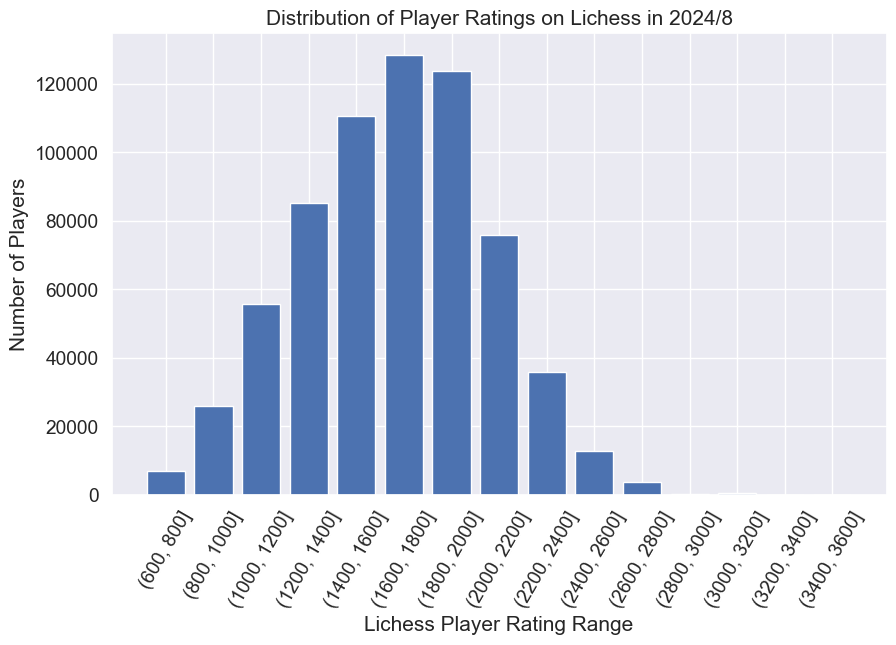

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


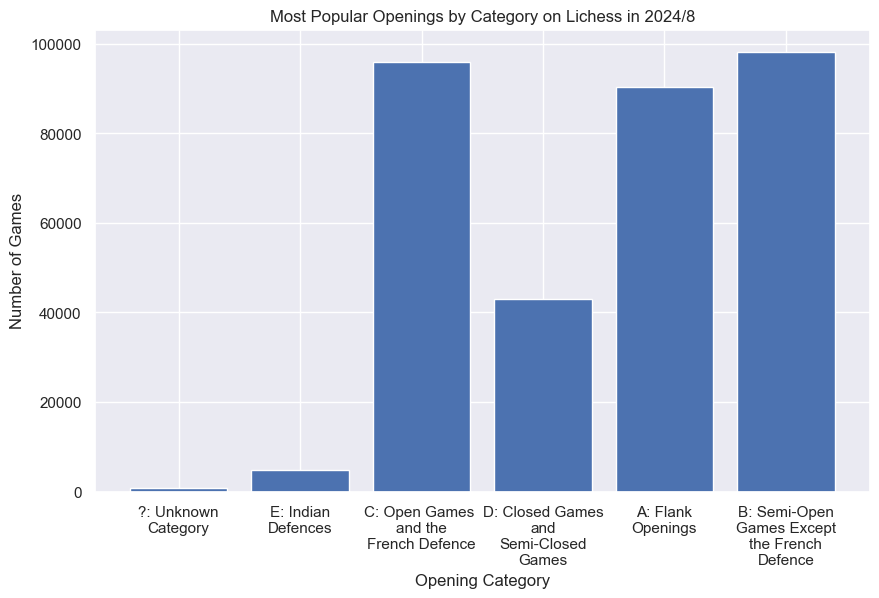

Processing chunk_2...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_2.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


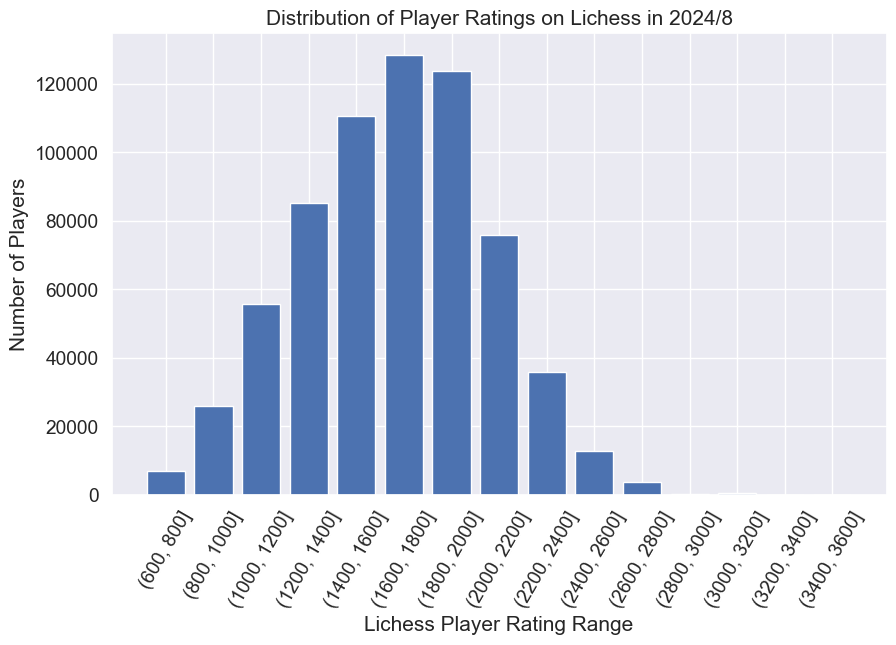

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


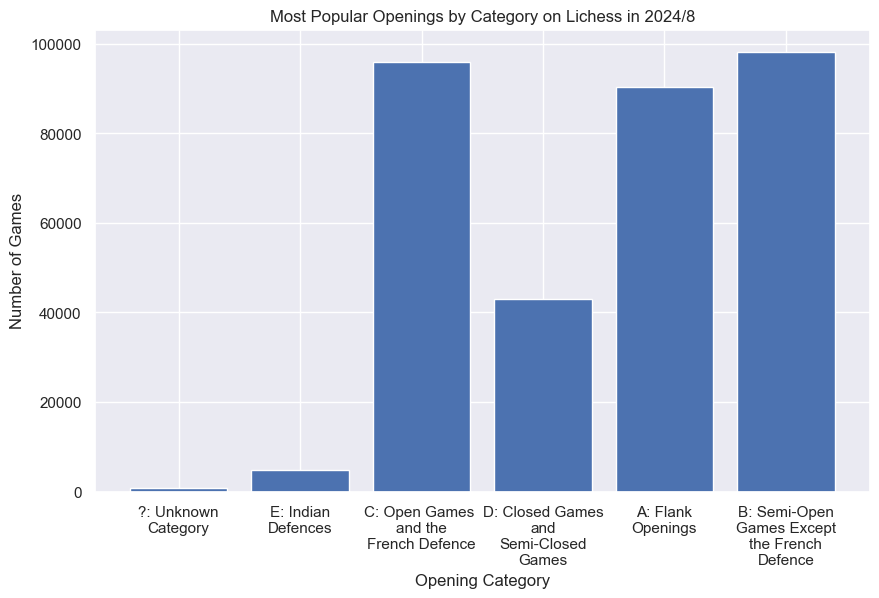

Processing chunk_3...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_3.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


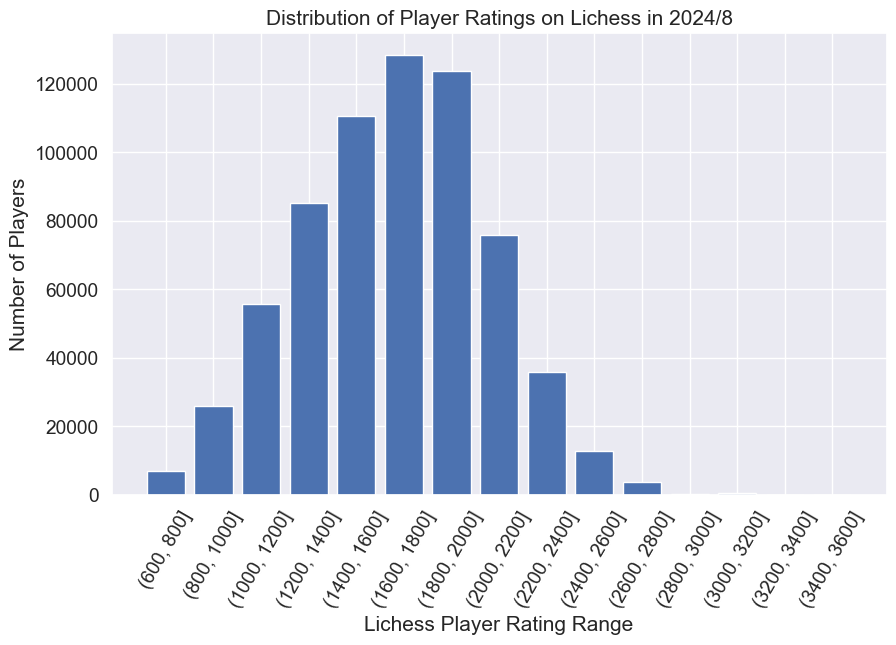

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


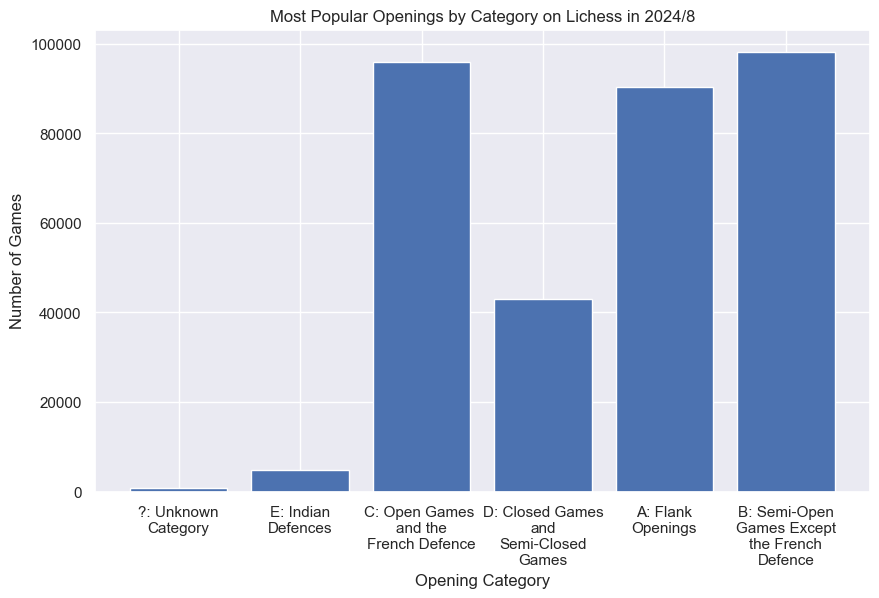

Processing chunk_4...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_4.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


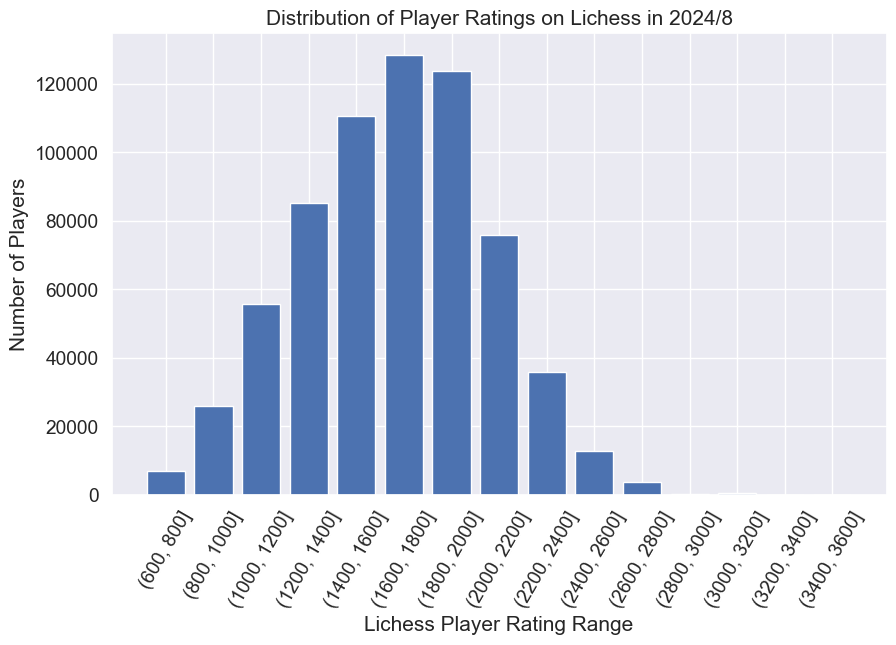

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


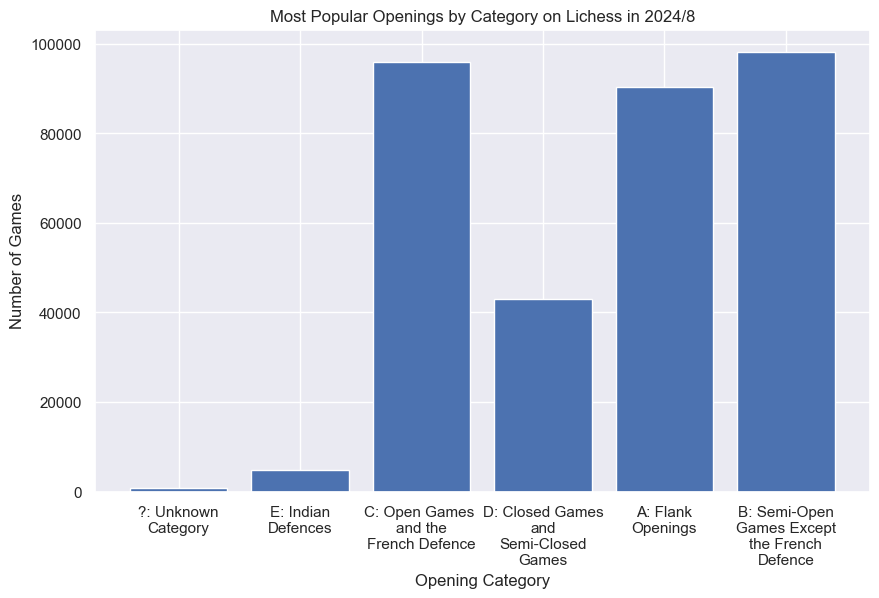

Processing chunk_5...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_5.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


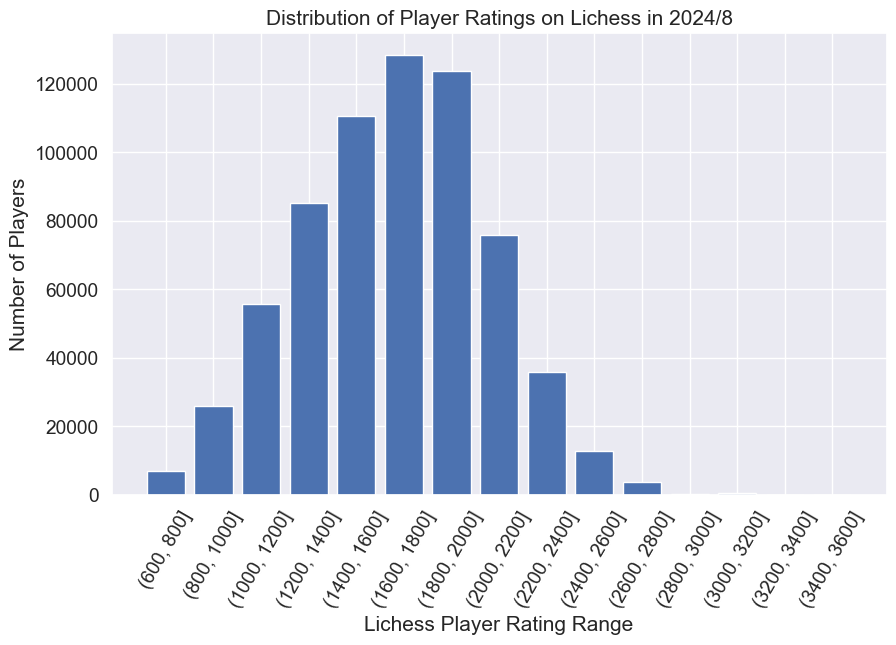

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


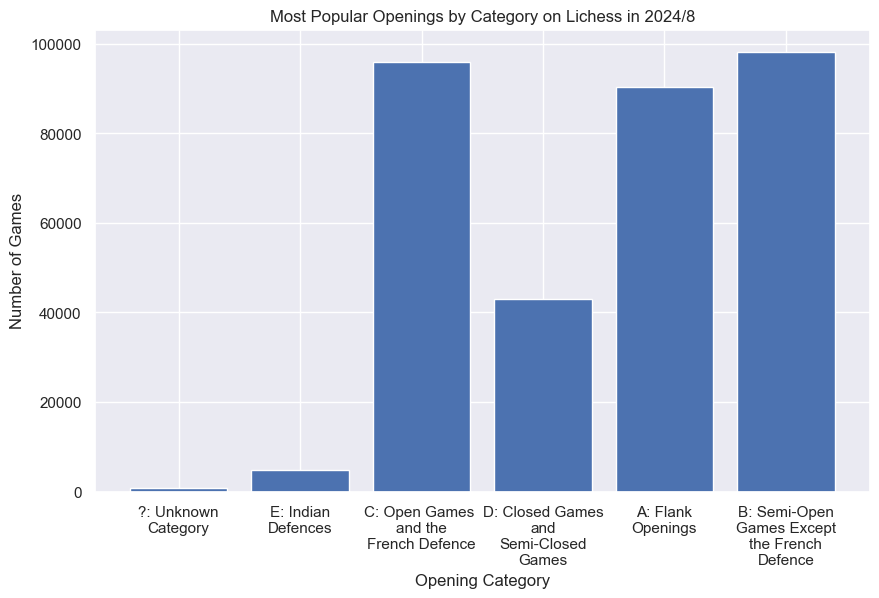

Processing chunk_6...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_6.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


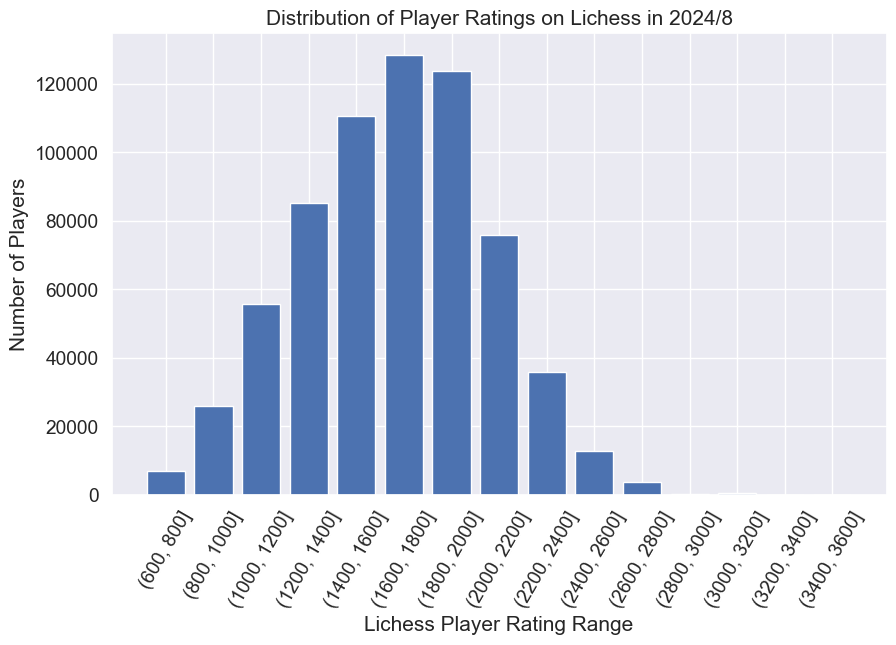

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


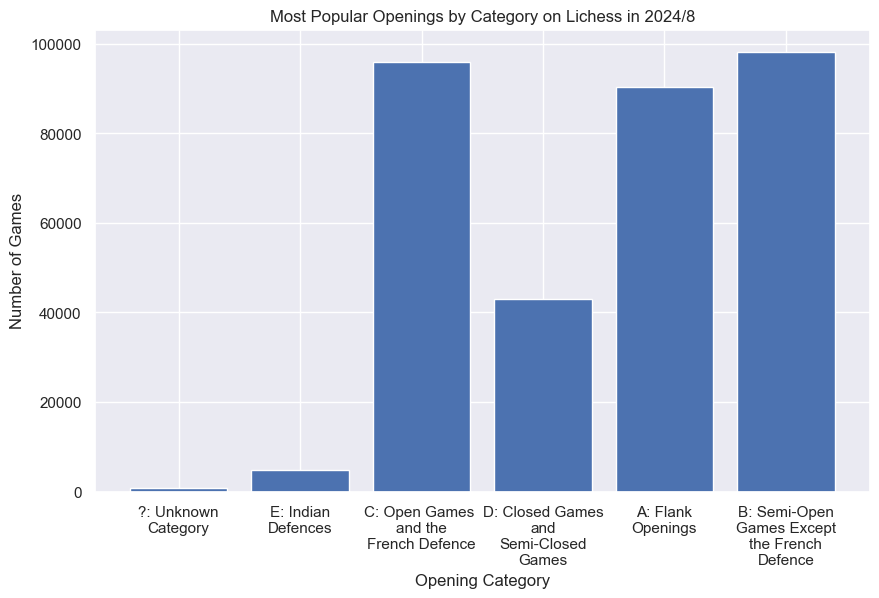

Processing chunk_7...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_7.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


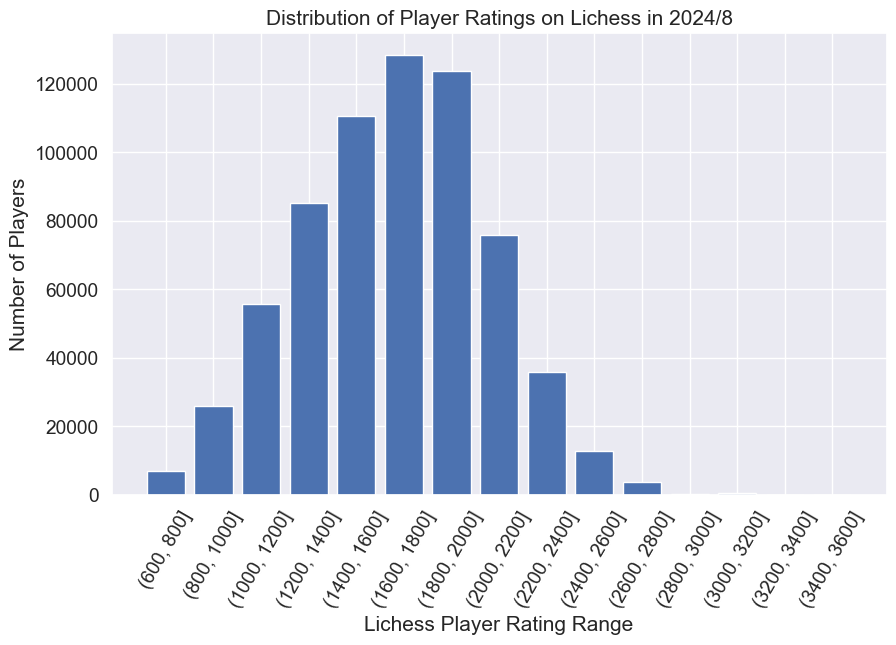

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


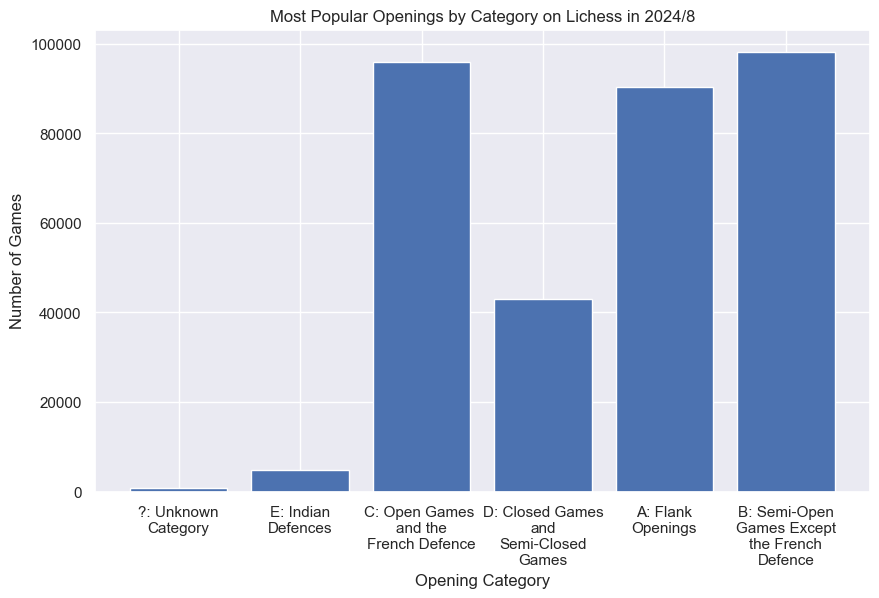

Processing chunk_8...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_8.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


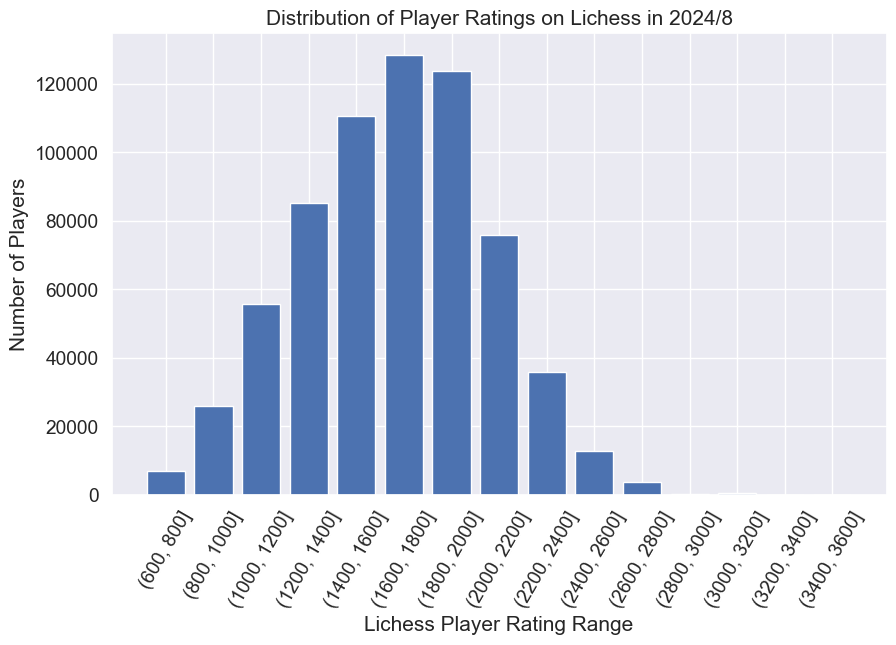

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


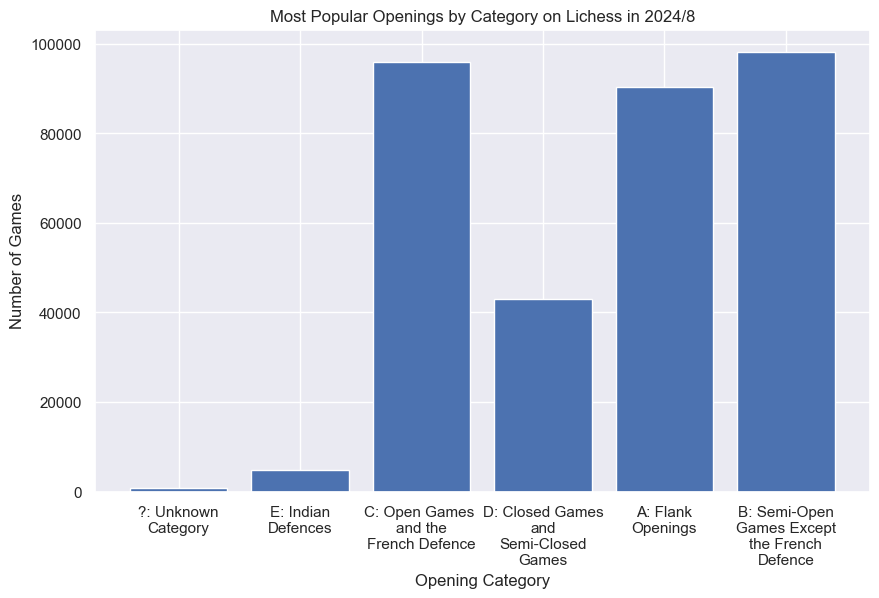

Processing chunk_9...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_9.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


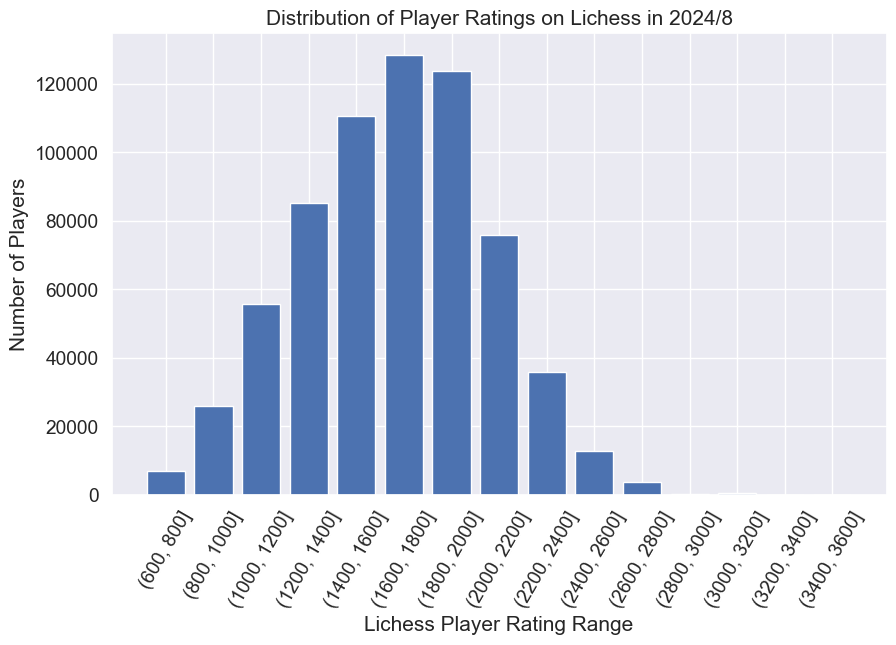

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


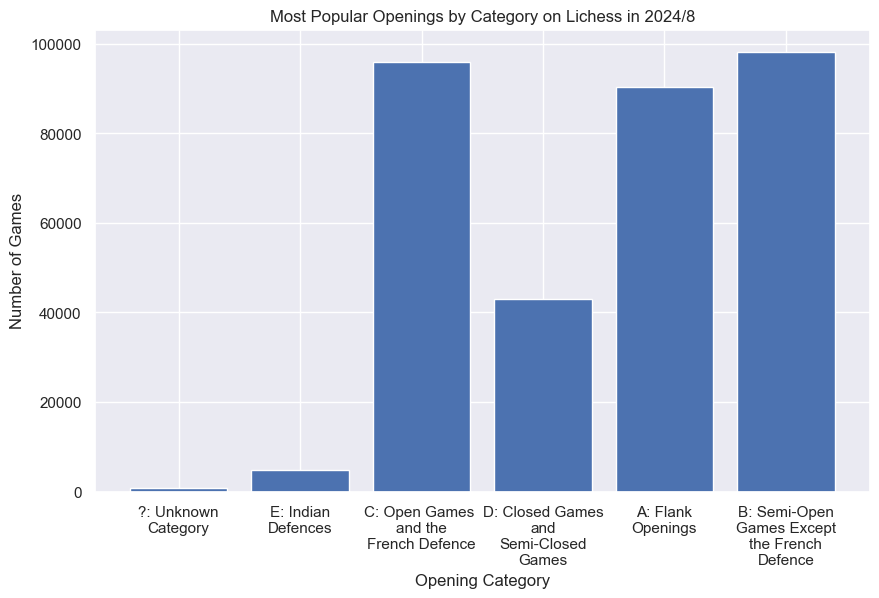

Processing chunk_10...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_10.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


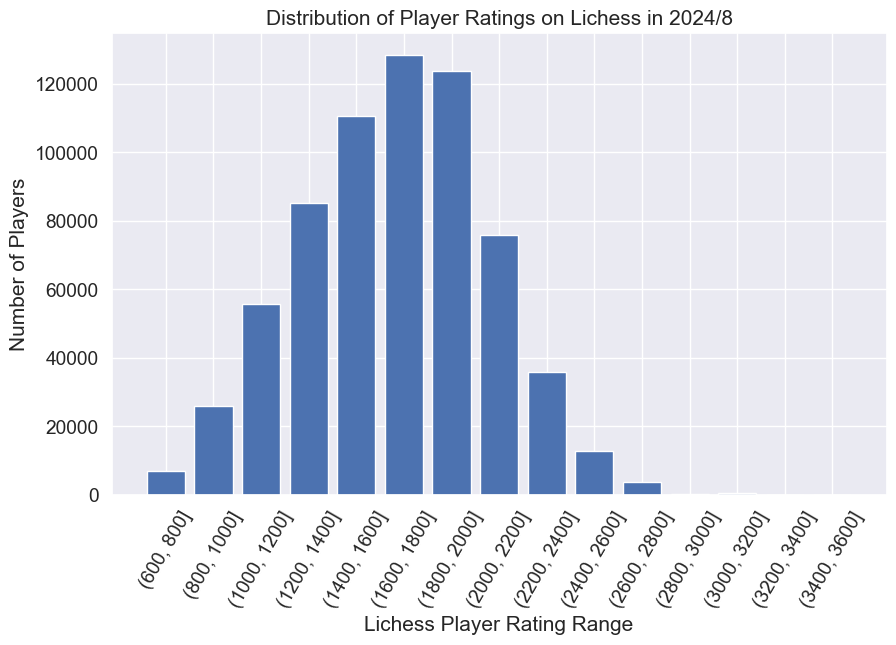

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


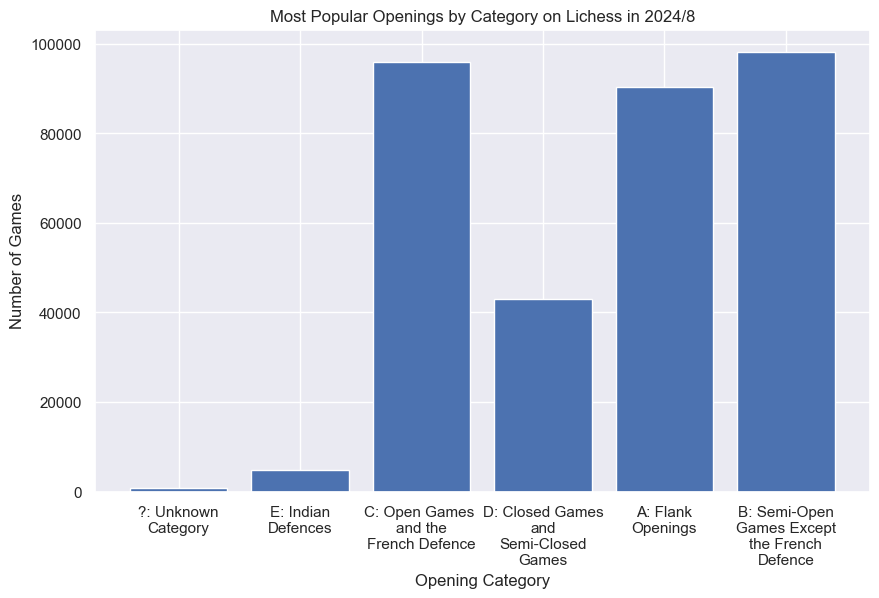

Processing chunk_11...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_11.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


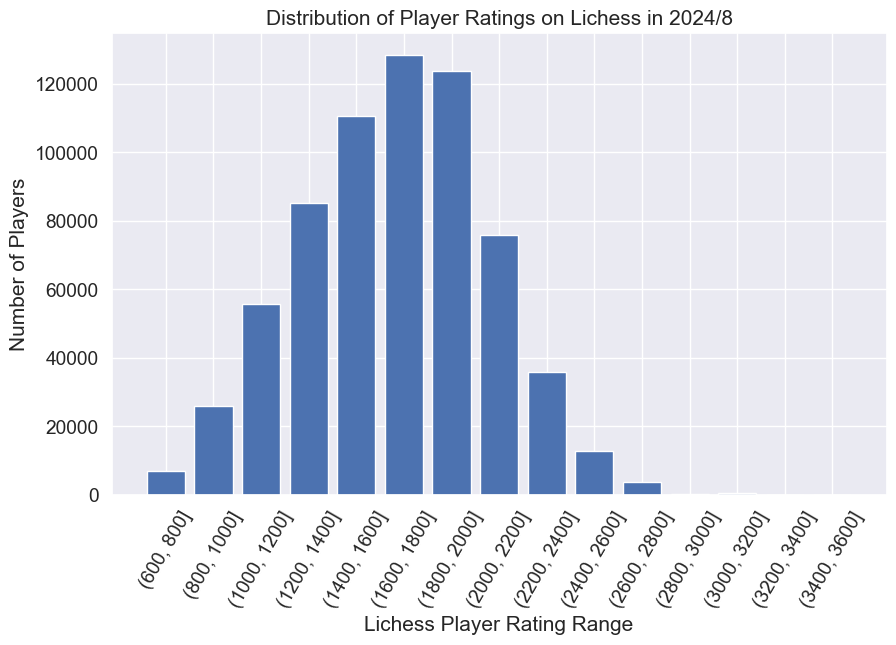

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


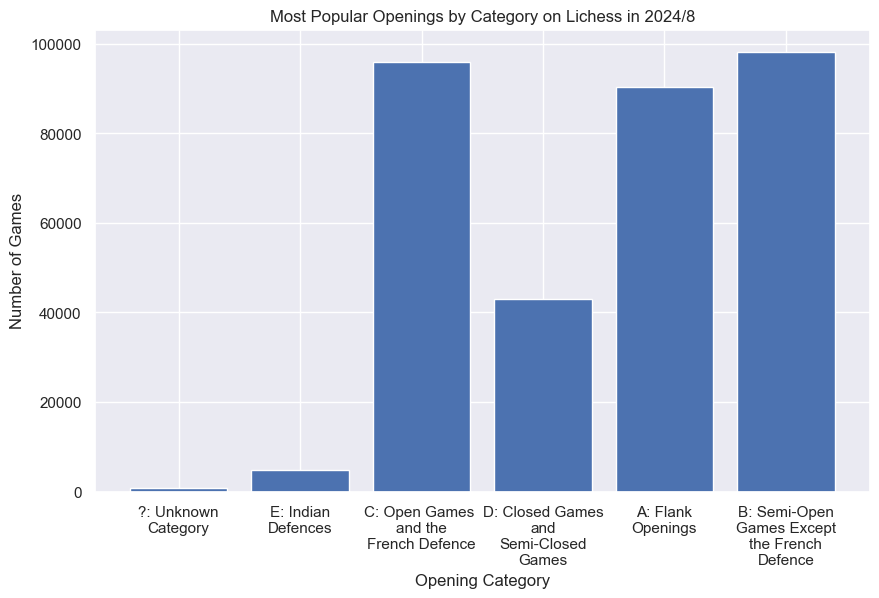

Processing chunk_12...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_12.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


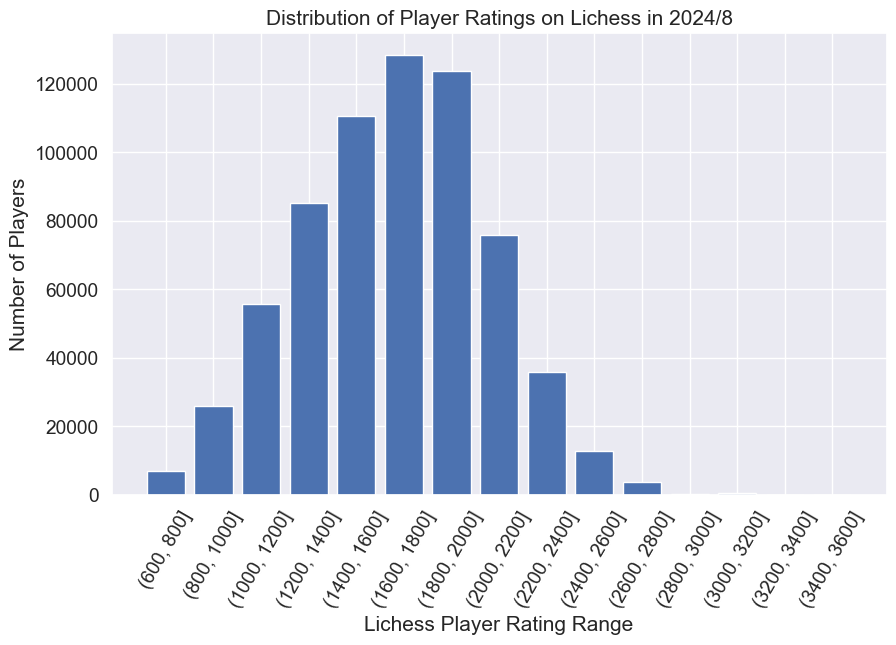

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


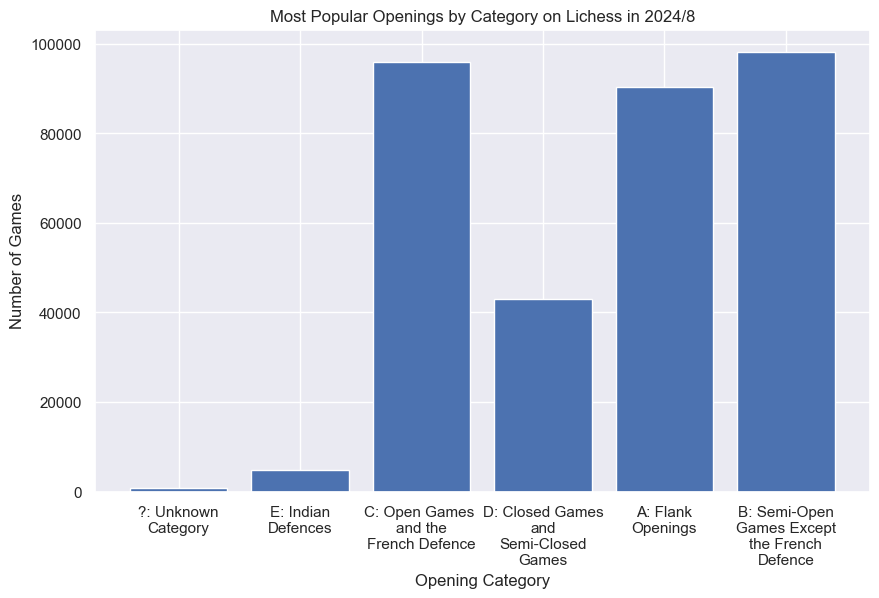

Processing chunk_13...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_13.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


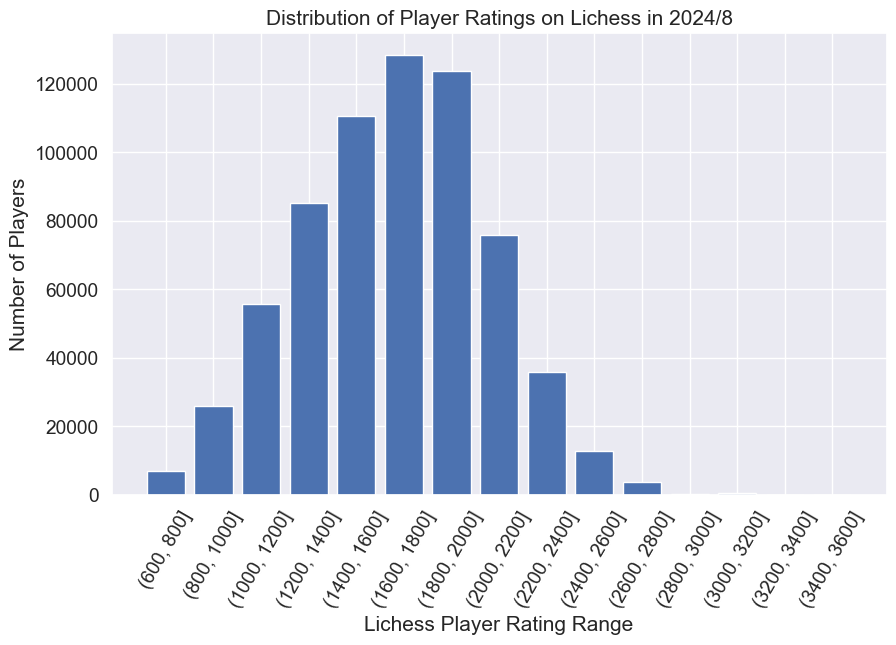

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


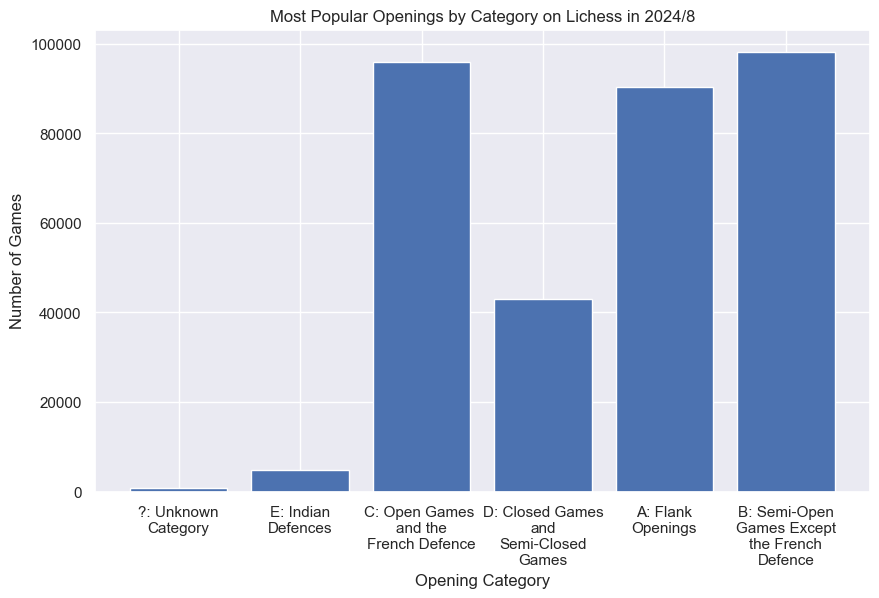

Processing chunk_14...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_14.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


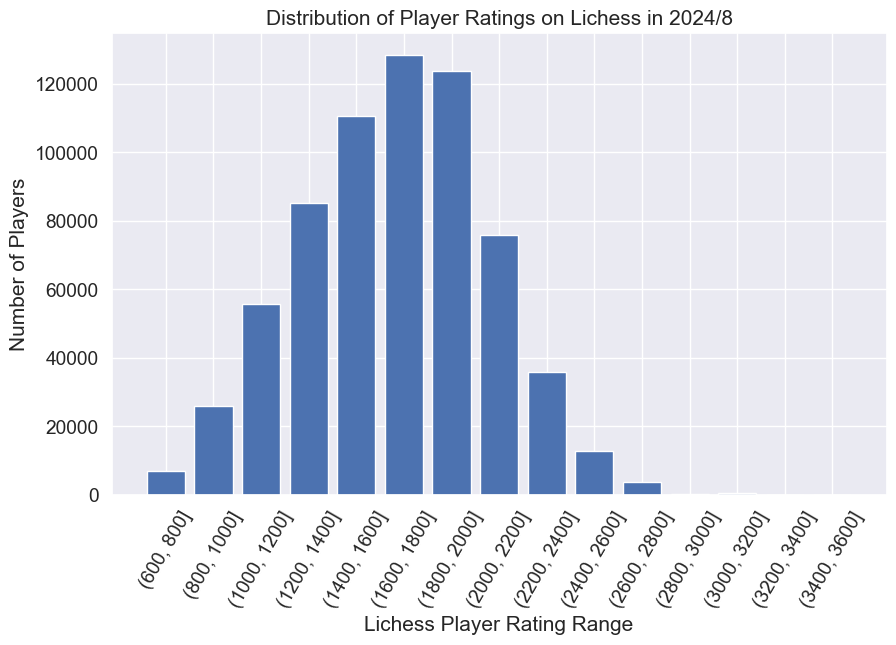

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


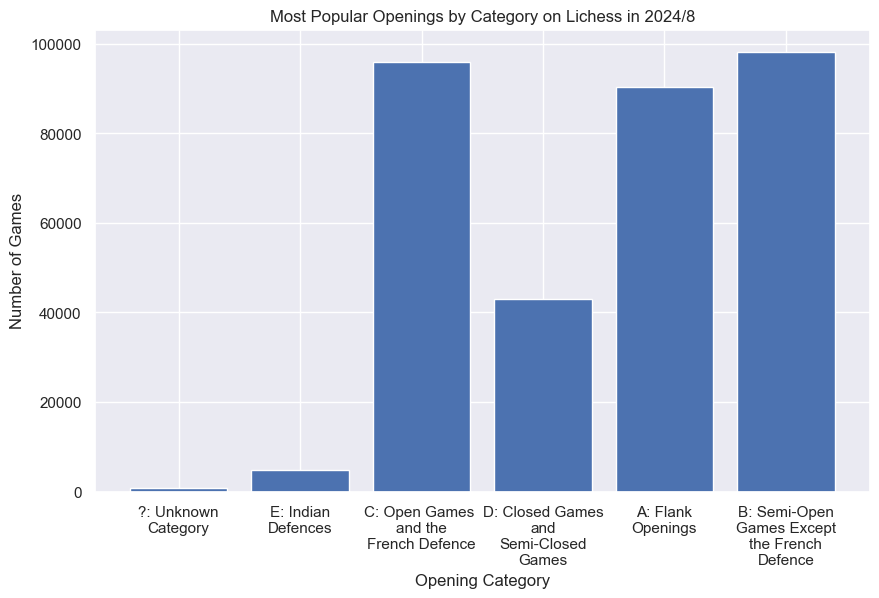

Processing chunk_15...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_15.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


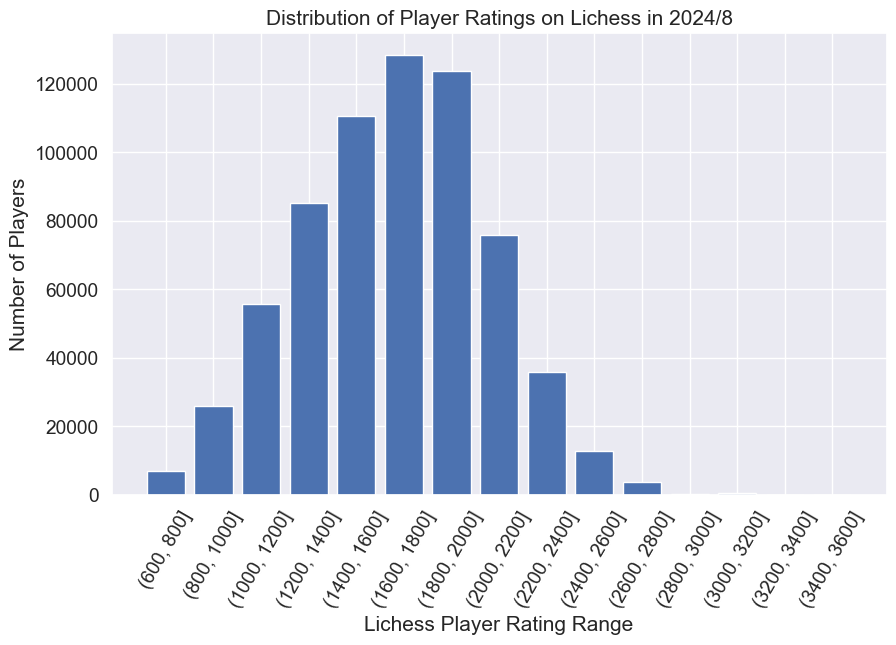

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


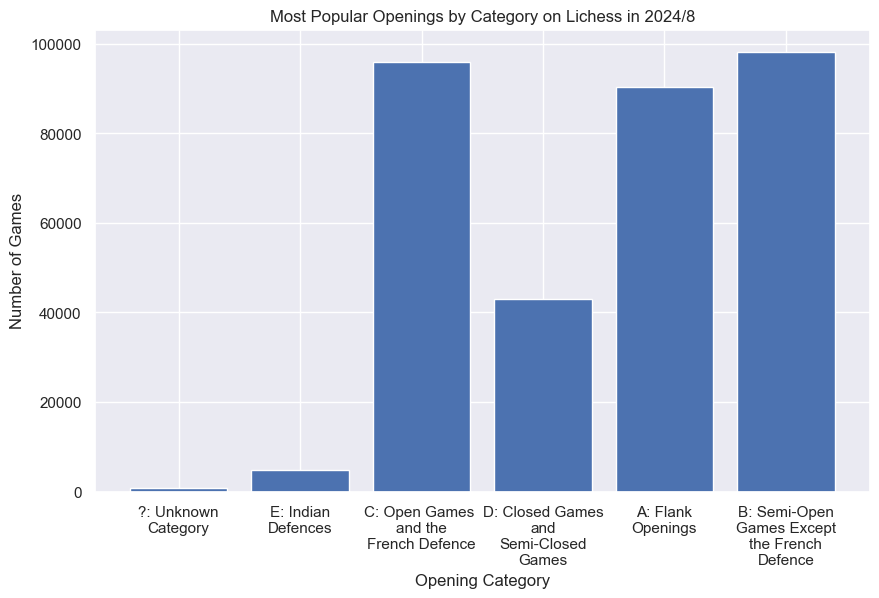

Processing chunk_16...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_16.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


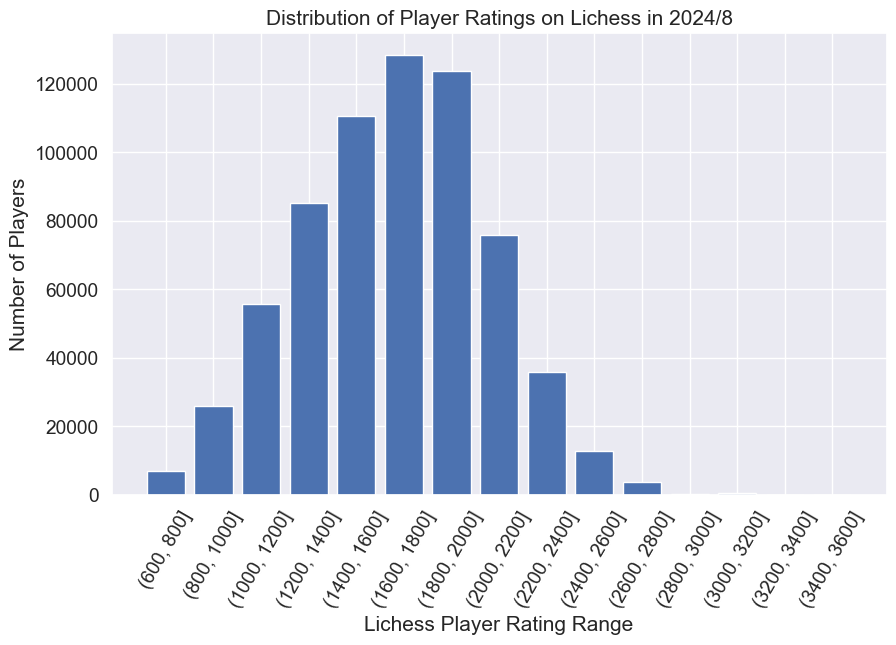

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


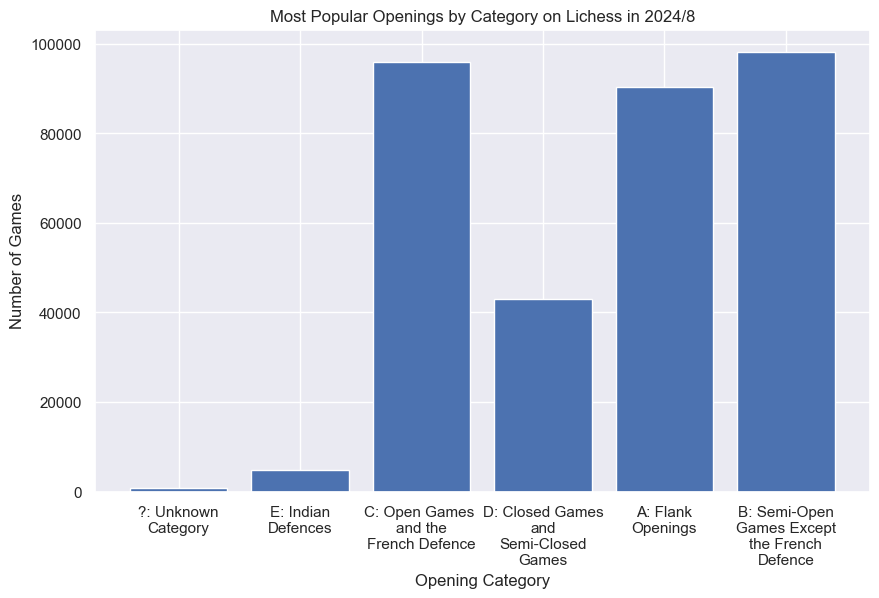

Processing chunk_17...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_17.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


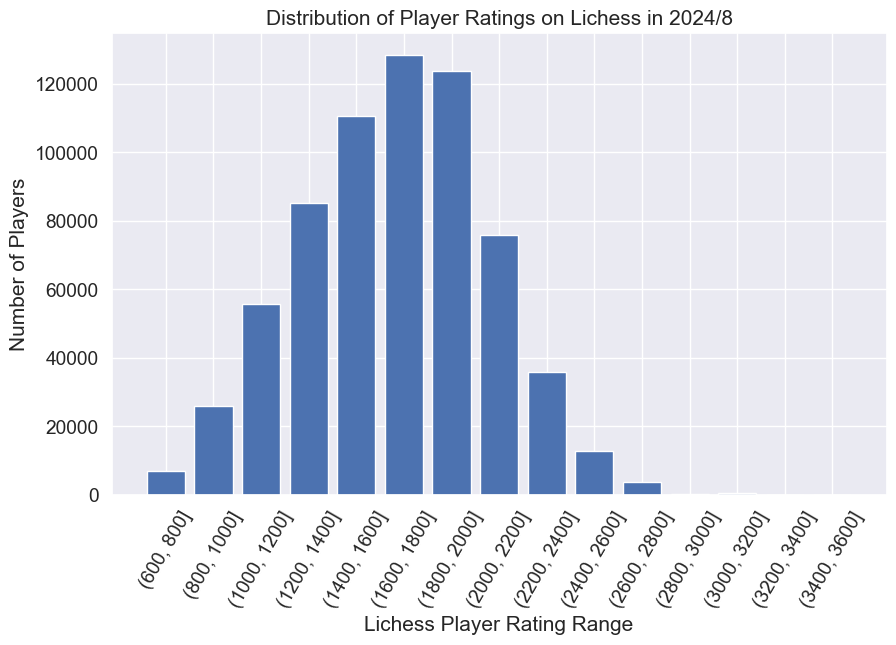

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


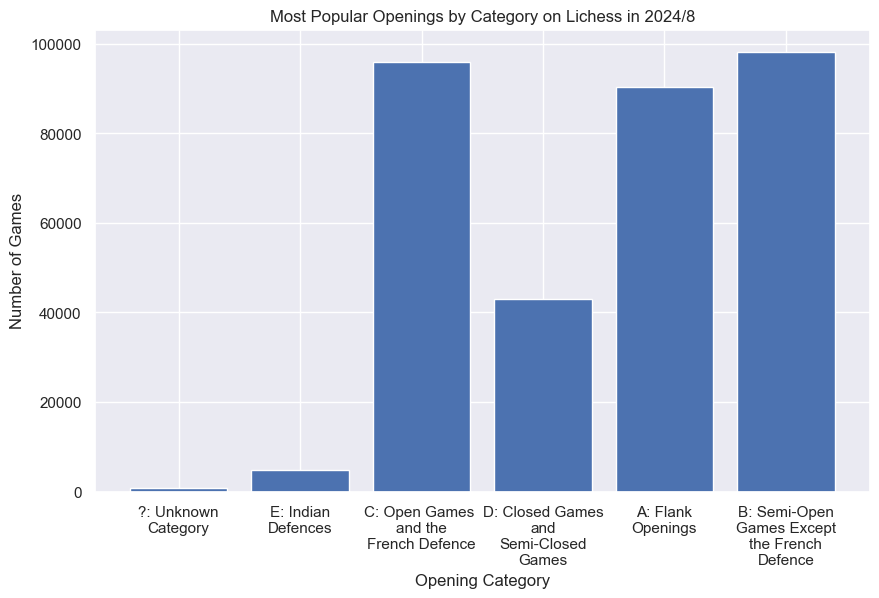

Processing chunk_18...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_18.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


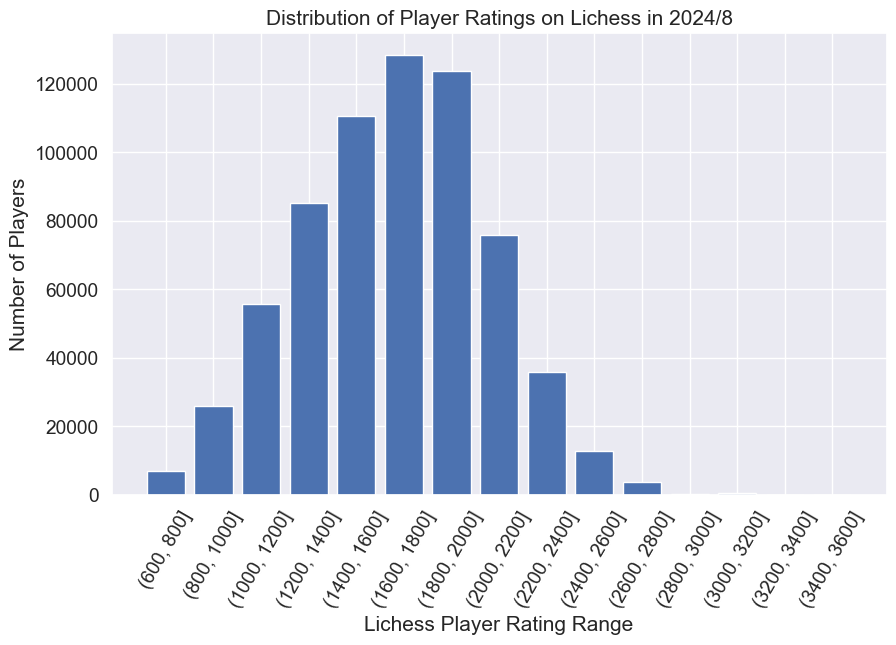

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


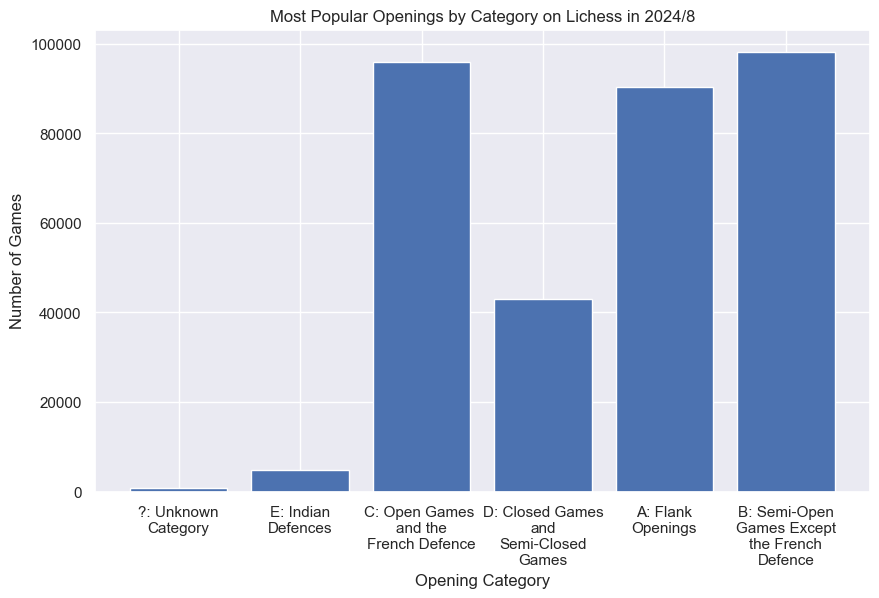

Processing chunk_19...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_19.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


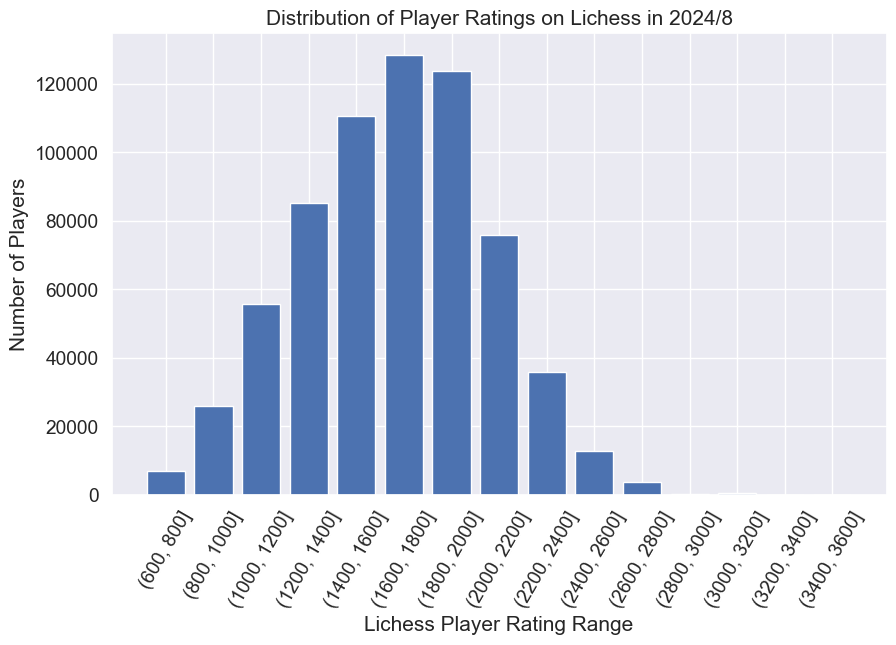

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


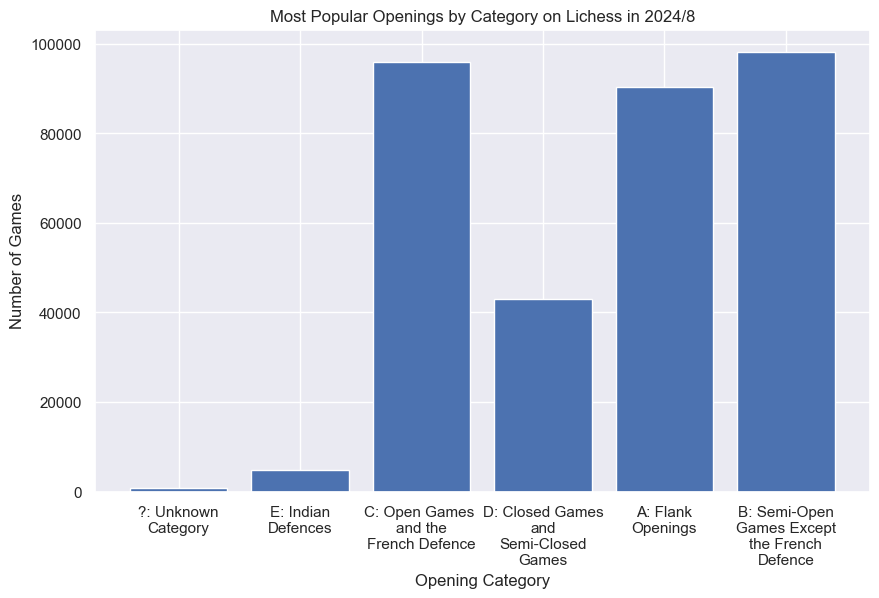

Processing chunk_20...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_20.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


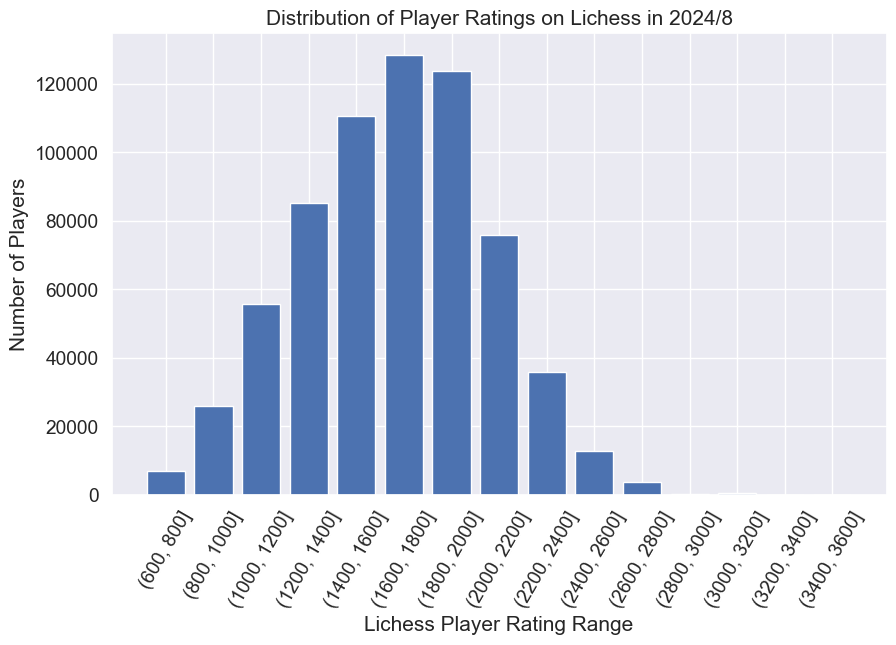

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


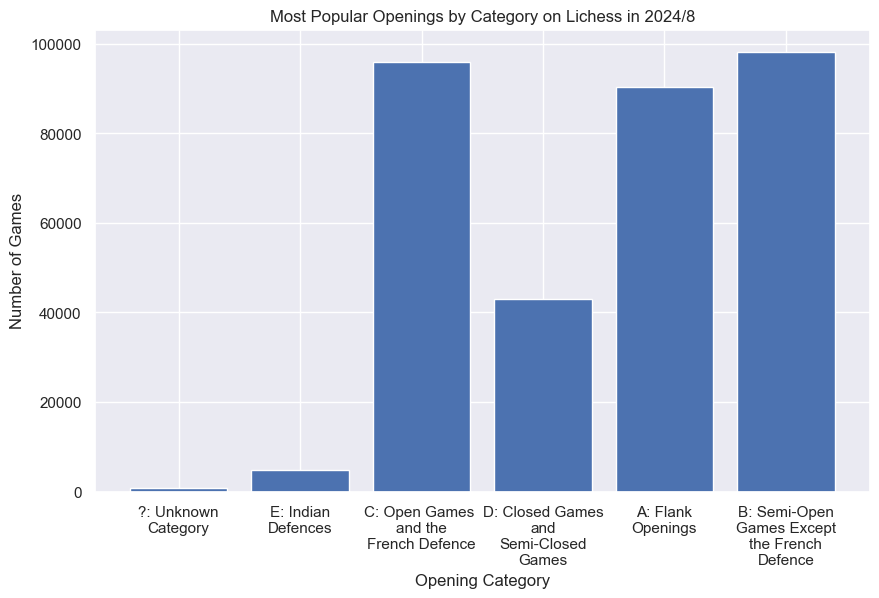

Processing chunk_21...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_21.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


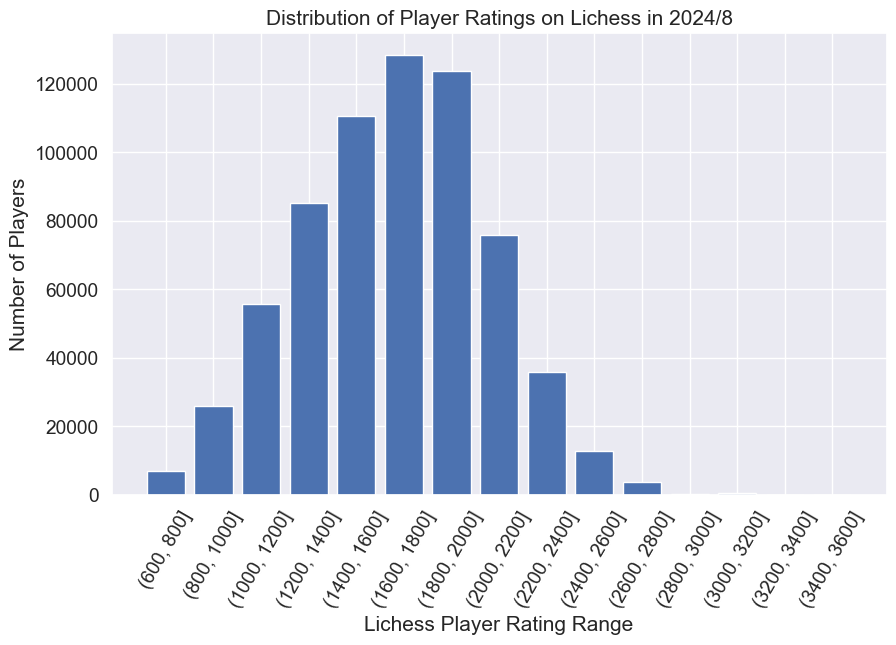

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


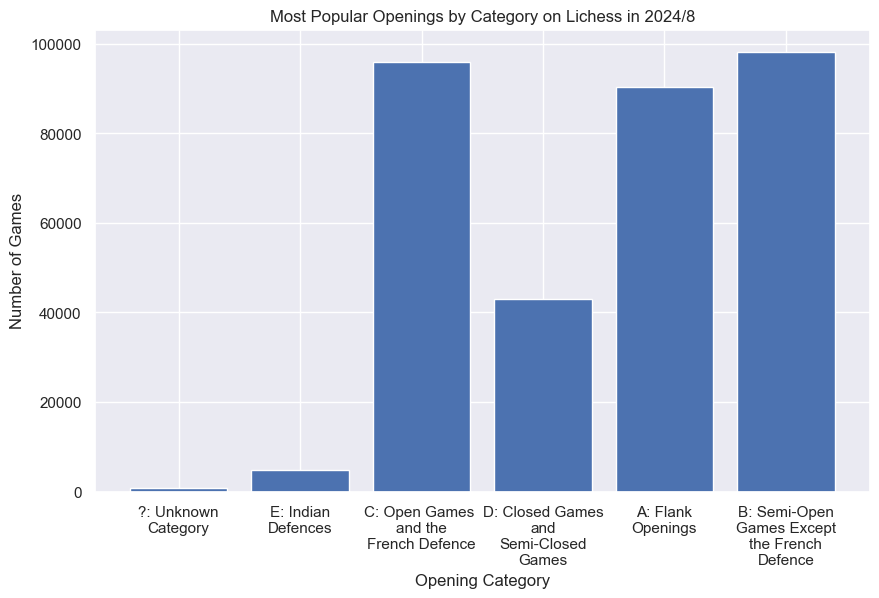

Processing chunk_22...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_22.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


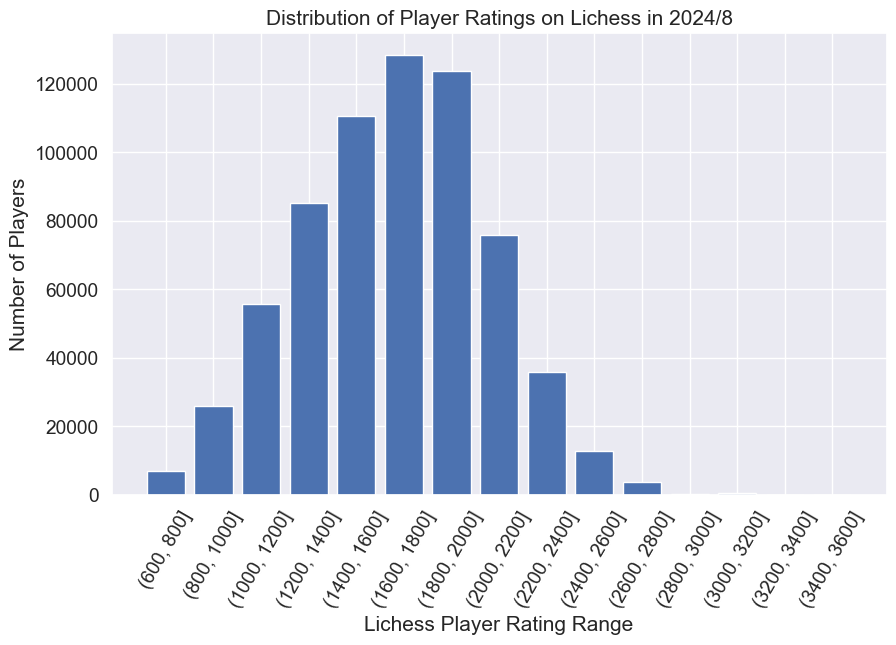

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


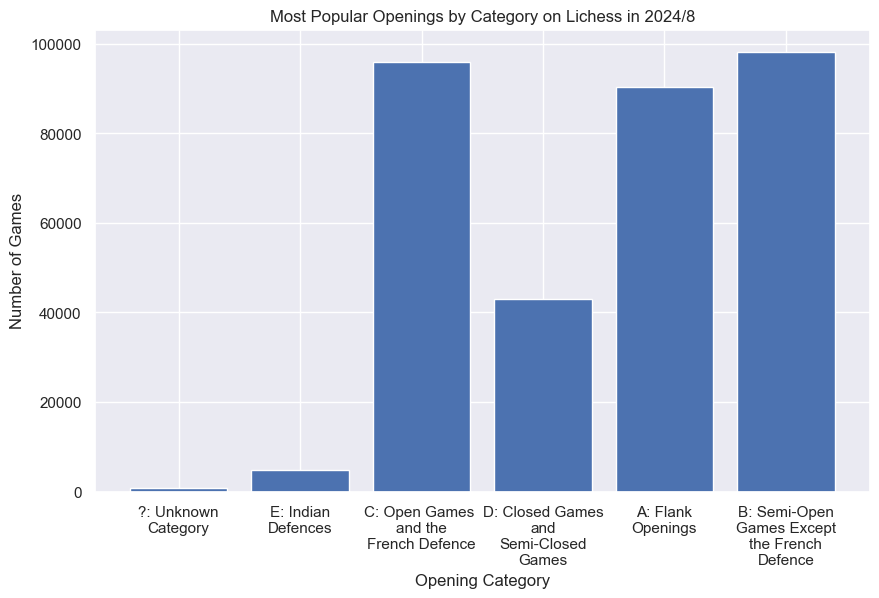

Processing chunk_23...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_23.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


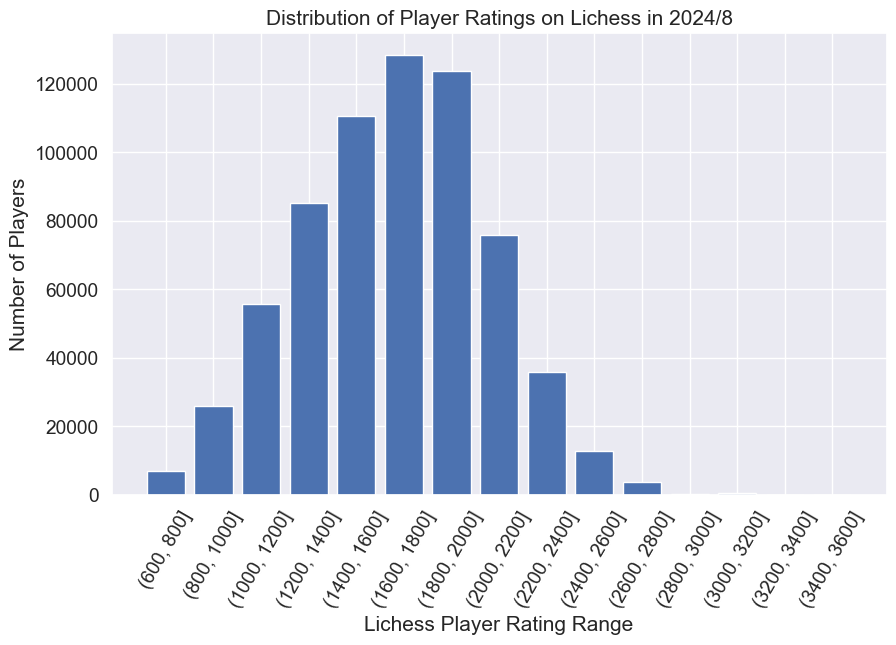

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


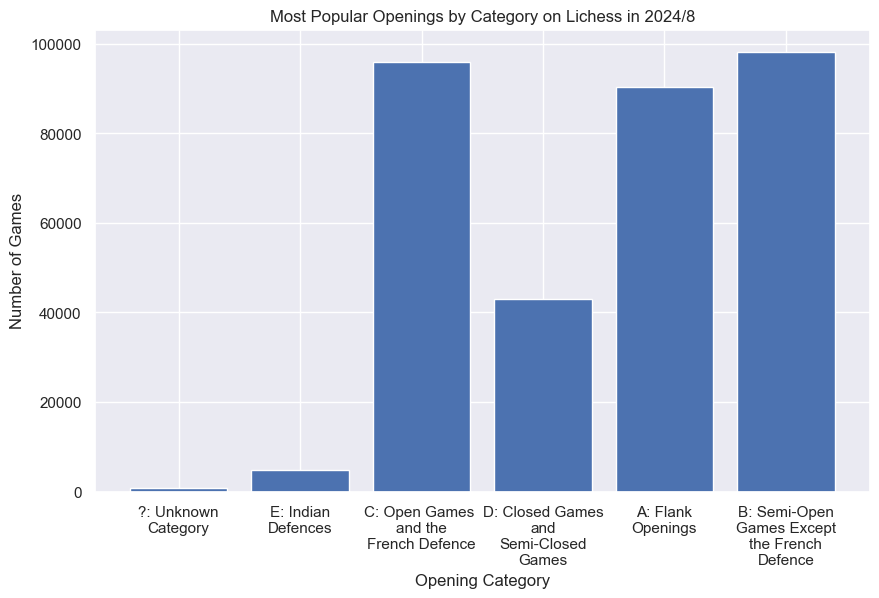

Processing chunk_24...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_24.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


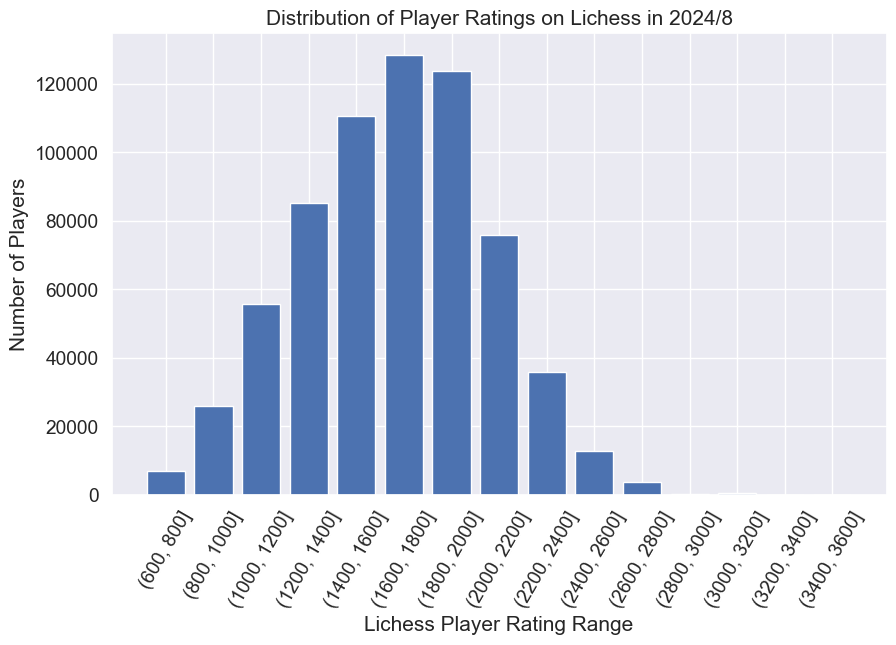

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


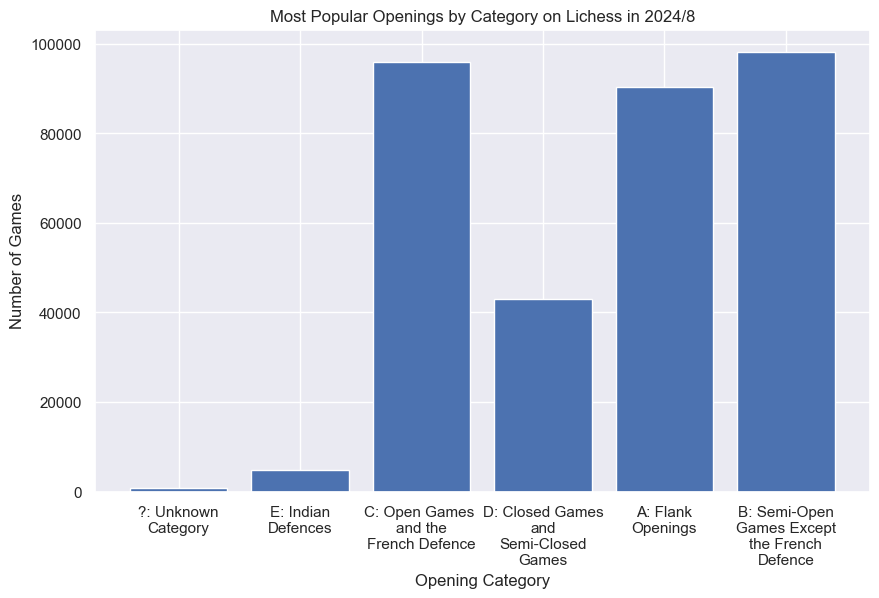

Processing chunk_25...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_25.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


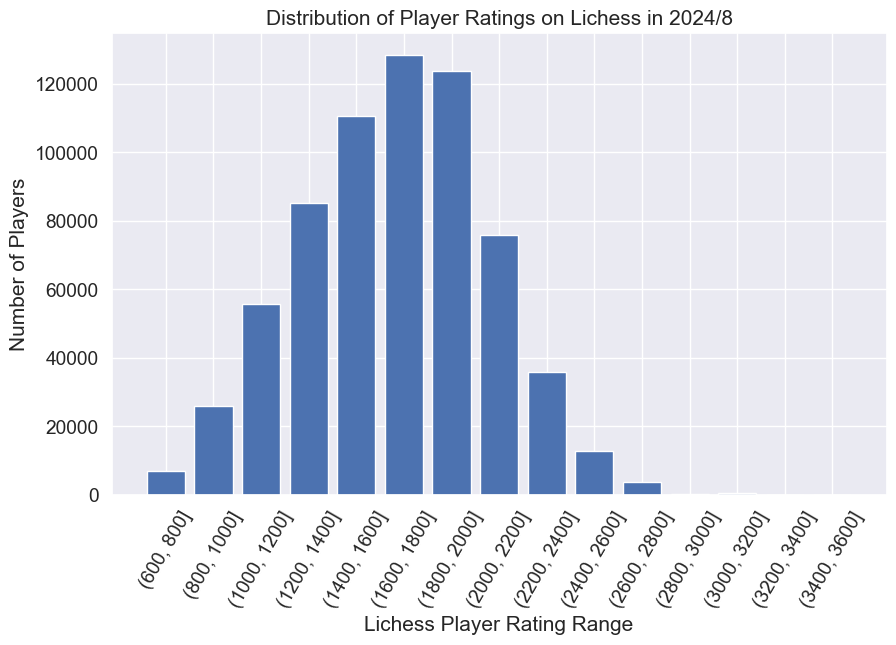

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


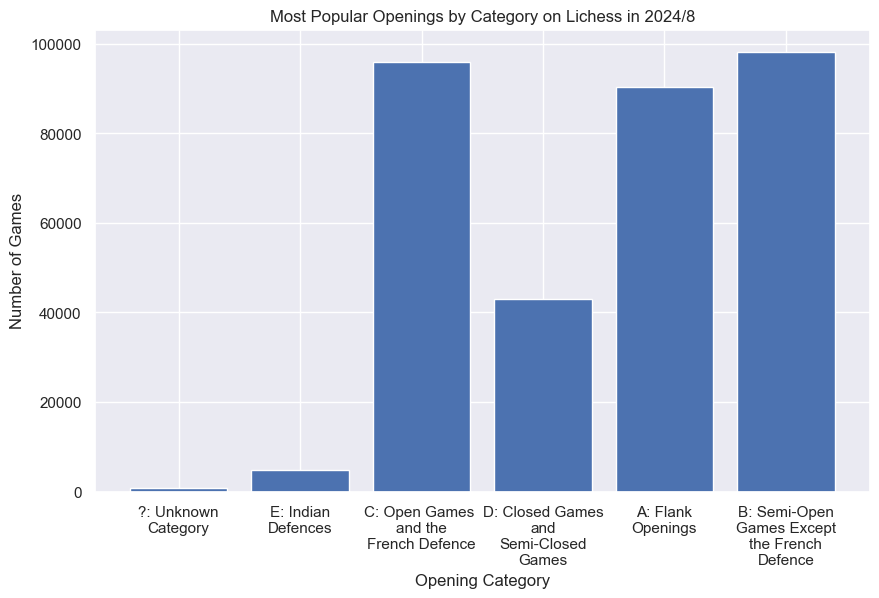

Processing chunk_26...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_26.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


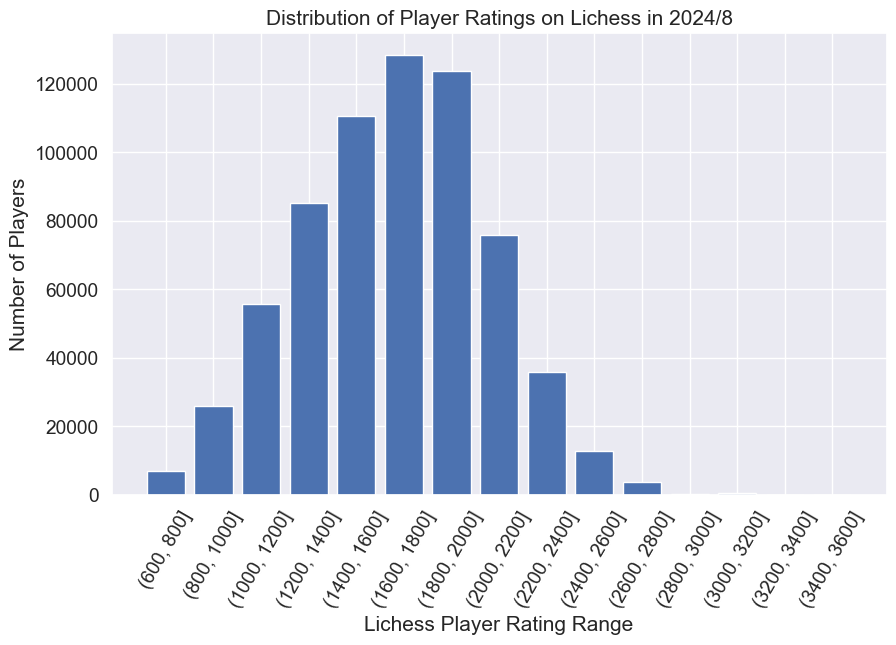

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


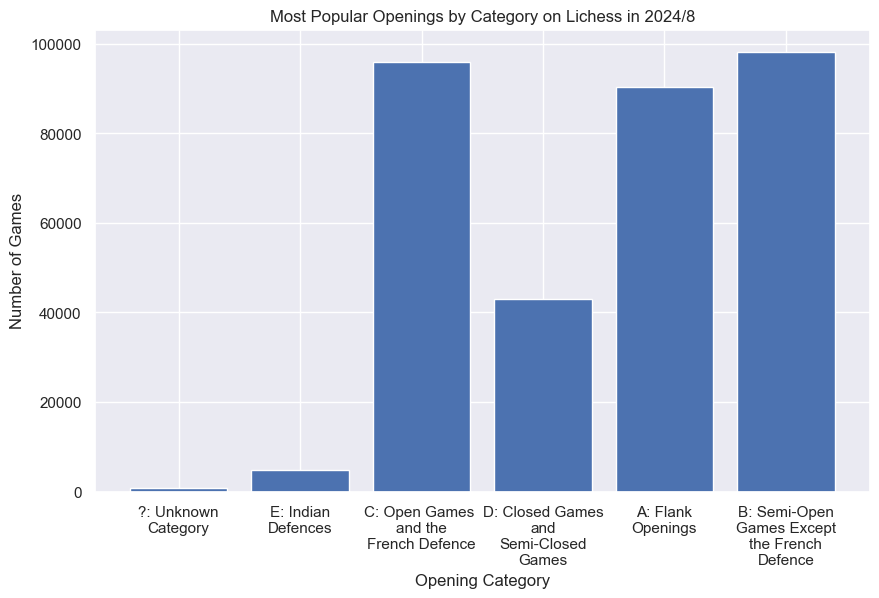

Processing chunk_27...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_27.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


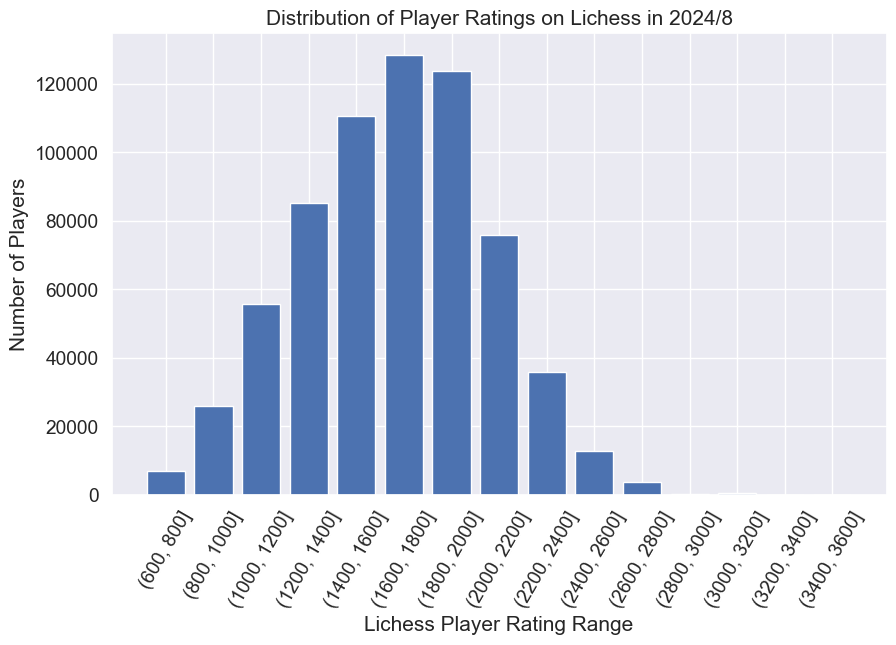

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


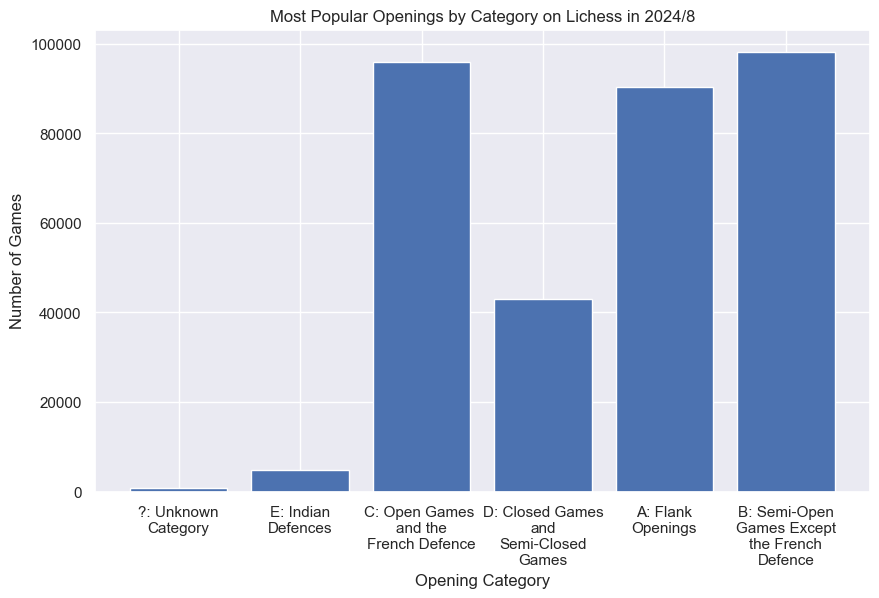

Processing chunk_28...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_28.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


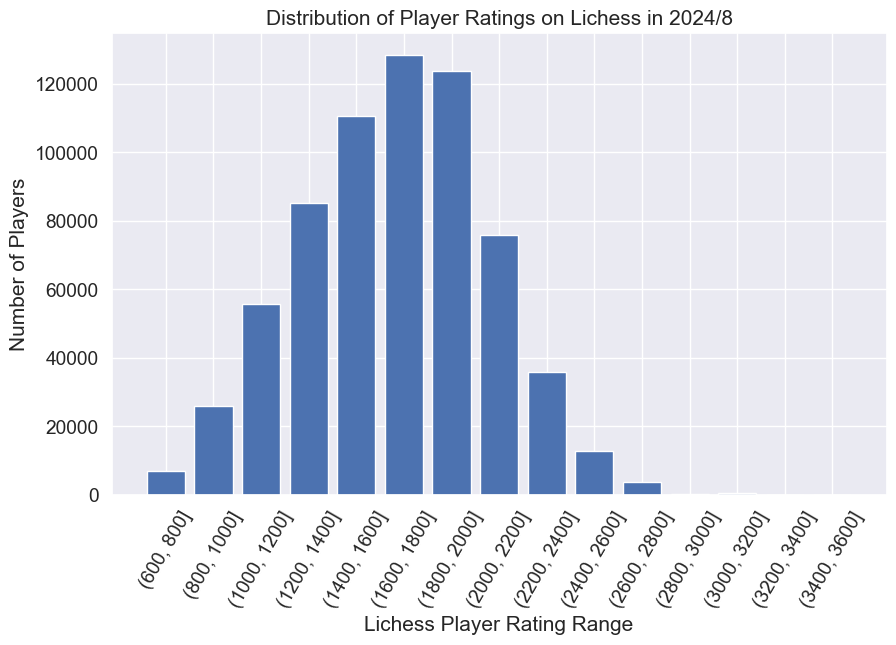

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


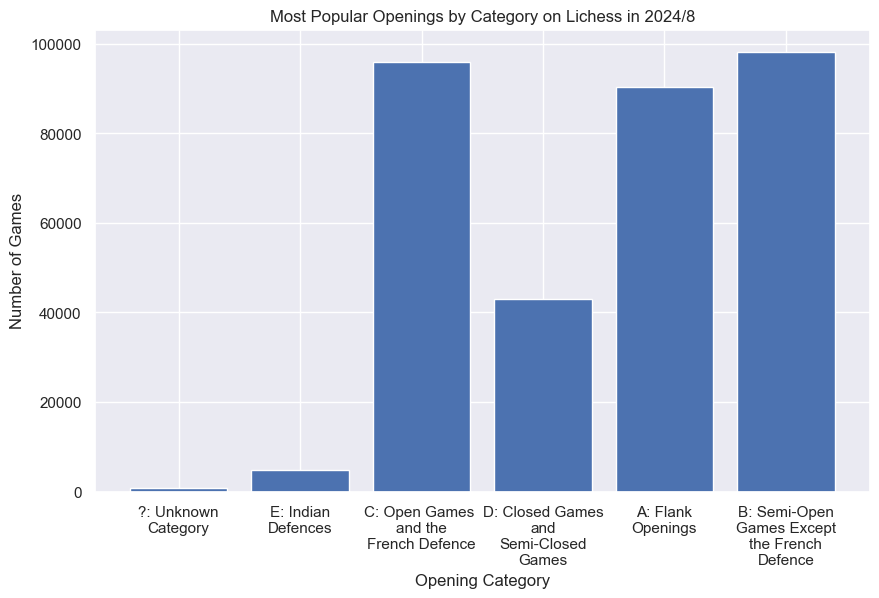

Processing chunk_29...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_29.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


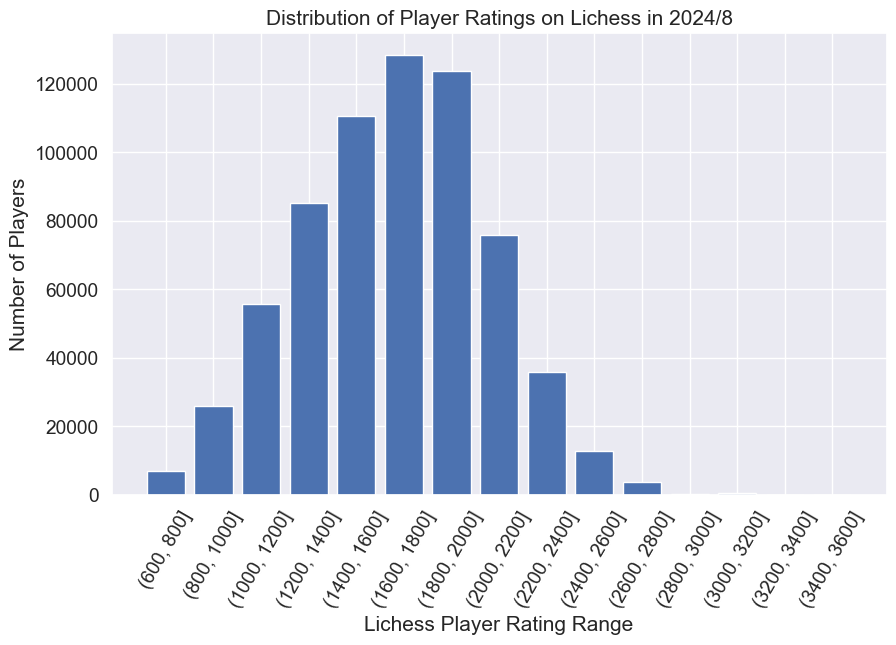

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


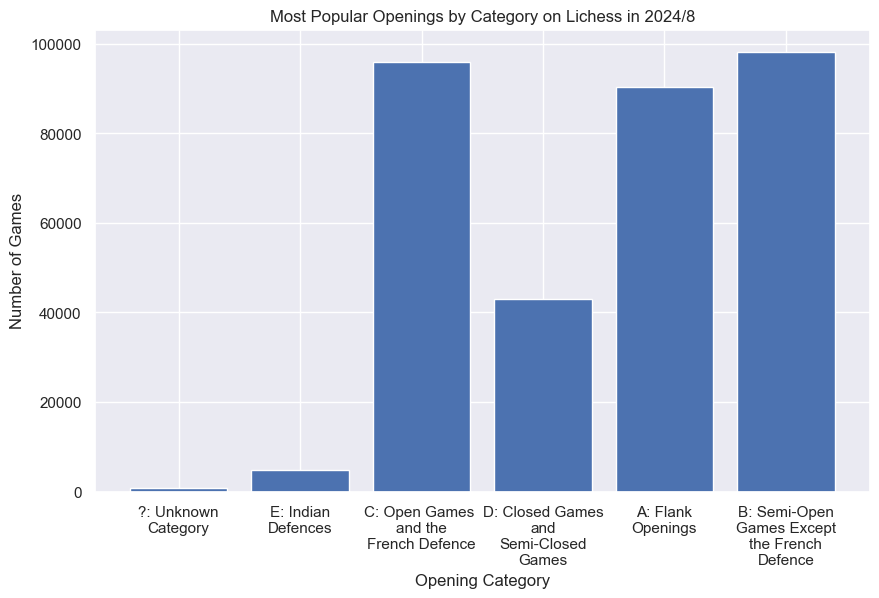

Processing chunk_30...
成功將 CHUNK/chunk_1.pgn 轉為 PARQUET/chunk_30.parquet
Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.

Number of Games: 333281
Number of Unique Players: 14883
Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


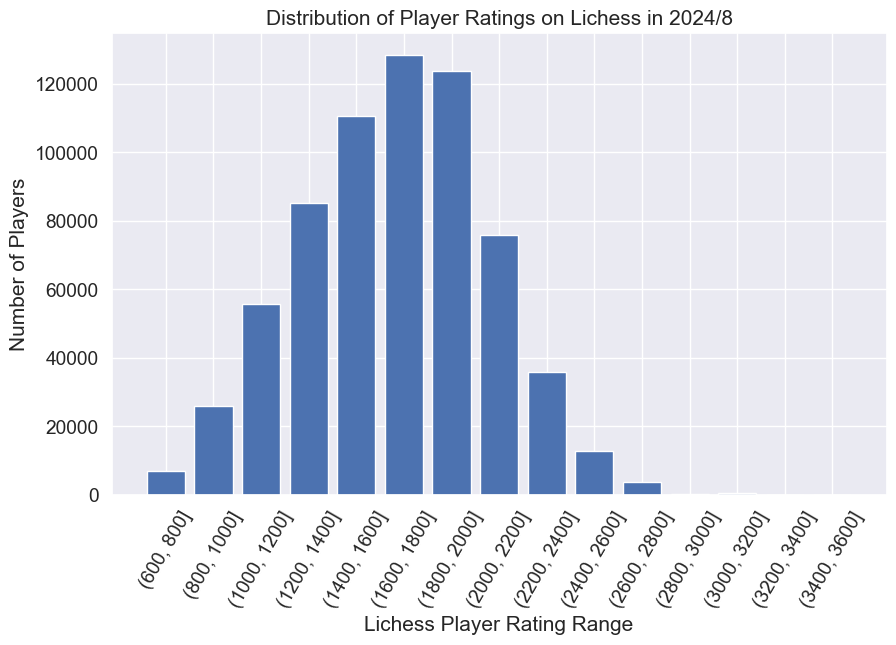

All Players:


ECO
?      806
E     4898
C    96007
D    43090
A    90241
B    98239
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_20560\4170699672.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


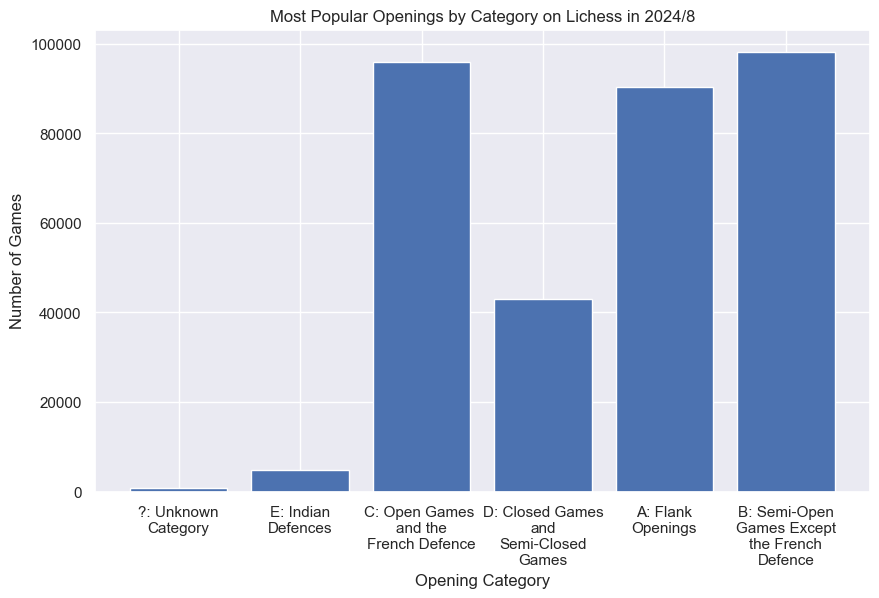

In [12]:
for chunk in chunks:
    print(f"Processing {chunk}...")
    # Add actual processing code here
    parquet_file = f"PARQUET/{chunk}.parquet"
    convert_pgn_to_parquet(pgn_file, parquet_file)
    
    DATA_PATH = "PARQUET/"
    # Check whether the DataFrame has been loaded correctly.
    df = dd.read_parquet(DATA_PATH, engine="pyarrow")
    print(f"Loaded {len(df)} Rated Blitz and Rated Rapid games from 2024/8.\n")

    print(f"Number of Games: {len(df)}")
    print(
        "Number of Unique Players: "
        f"{dd.concat([df['White'], df['Black']]).nunique().compute()}"
    )
    #display(df.head())

    # Merge the counts into one, as the player's side isn't important.
    white_rating_count = df["WhiteElo"].value_counts().compute()
    black_rating_count = df["BlackElo"].value_counts().compute()
    rating_counts = (
        pd.concat([white_rating_count, black_rating_count], axis=1).fillna(0).astype(int)
    )
    rating_counts = rating_counts.sum(axis=1)
    rating_counts.index = rating_counts.index.astype(int)
    # Find the minimum and maximum player rating.
    max_rating = rating_counts.index.max()
    min_rating = rating_counts.index.min()
    print(f"Maximum Player Rating: {max_rating}")
    print(f"Minimum Player Rating: {min_rating}")

    # Define the bin edges for player ratings from 600 (minimum in Lichess) to
    # 3600 in intervals of 200.

    rating_bins = np.arange(600, 3601, 200)
    rating_counts.index = pd.cut(rating_counts.index, bins=rating_bins)
    merged_rating_counts = rating_counts.groupby(level=0).sum()
    display(merged_rating_counts)

     # Plot a graph to show the distribution of player ratings.
    sns.set_theme(font_scale=1.25)
    fig, ax = plt.subplots(figsize=(10, 6))
    indexes = merged_rating_counts.index.astype(str)
    values = merged_rating_counts.values
    ax.bar(indexes, values)
    ax.set_title("Distribution of Player Ratings on Lichess in 2024/8")
    ax.set_xlabel("Lichess Player Rating Range")
    ax.set_ylabel("Number of Players")
    ax.set_xticklabels(indexes, rotation=60)
    plt.show()

     # Find the most common ECO categories.
    eco_categories = df["ECO"].str[0].value_counts().compute()
    print("All Players:")
    display(eco_categories)

    # Map each opening category to its type.
    opening_category_map = {
        "A": "Flank\nOpenings",
        "B": "Semi-Open\nGames Except\nthe French\nDefence",
        "C": "Open Games \nand the\nFrench Defence",
        "D": "Closed Games\nand\nSemi-Closed\nGames",
        "E": "Indian\nDefences",
        "?": "Unknown\nCategory",
    }

    # Plot the number of games in each opening category.
    sns.set_theme(font_scale=1)
    fig, ax = plt.subplots(figsize=(10, 6))
    indexes = eco_categories.index
    values = eco_categories.values
    ax.bar(indexes, values)
    ax.set_title("Most Popular Openings by Category on Lichess in 2024/8")
    ax.set_xlabel("Opening Category")
    ax.set_ylabel("Number of Games")
    ax.set_xticklabels(
        [str(f"{index}: {opening_category_map[index]}") for index in indexes]
    )
    plt.show()

In [7]:
    DATA_PATH = "PARQUET/"
    # Check whether the DataFrame has been loaded correctly.
    df = dd.read_parquet(DATA_PATH, engine="pyarrow")
    print(f"Loaded {len(df)} Rated Blitz and Rated Rapid games from 2024/8.\n")

Loaded 333281 Rated Blitz and Rated Rapid games from 2024/8.



In [8]:
    print(f"Number of Games: {len(df)}")
    print(
        "Number of Unique Players: "
        f"{dd.concat([df['White'], df['Black']]).nunique().compute()}"
    )
    #display(df.head())

Number of Games: 333281
Number of Unique Players: 14883


In [9]:
    # Merge the counts into one, as the player's side isn't important.
    white_rating_count = df["WhiteElo"].value_counts().compute()
    black_rating_count = df["BlackElo"].value_counts().compute()
    rating_counts = (
        pd.concat([white_rating_count, black_rating_count], axis=1).fillna(0).astype(int)
    )
    rating_counts = rating_counts.sum(axis=1)
    rating_counts.index = rating_counts.index.astype(int)
    # Find the minimum and maximum player rating.
    max_rating = rating_counts.index.max()
    min_rating = rating_counts.index.min()
    print(f"Maximum Player Rating: {max_rating}")
    print(f"Minimum Player Rating: {min_rating}")

    # Define the bin edges for player ratings from 600 (minimum in Lichess) to
    # 3600 in intervals of 200.

    rating_bins = np.arange(600, 3601, 200)
    rating_counts.index = pd.cut(rating_counts.index, bins=rating_bins)
    merged_rating_counts = rating_counts.groupby(level=0).sum()
    display(merged_rating_counts)

Maximum Player Rating: 3156
Minimum Player Rating: 400


(600, 800]        6975
(800, 1000]      26071
(1000, 1200]     55738
(1200, 1400]     85281
(1400, 1600]    110515
(1600, 1800]    128433
(1800, 2000]    123690
(2000, 2200]     75795
(2200, 2400]     35743
(2400, 2600]     12710
(2600, 2800]      3720
(2800, 3000]       341
(3000, 3200]       589
(3200, 3400]         0
(3400, 3600]         0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_11120\3439380959.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(indexes, rotation=60)


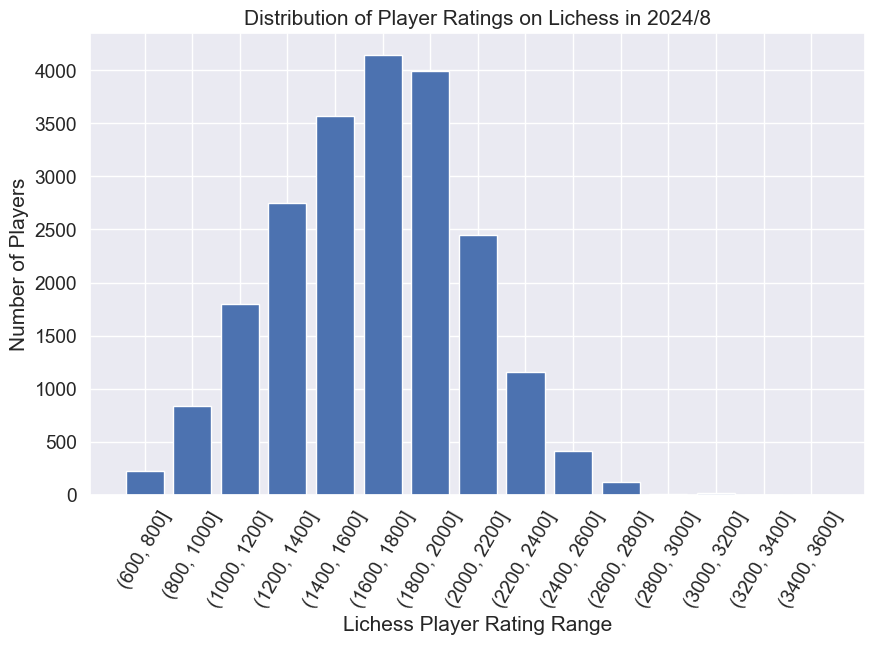

In [13]:
    # Plot a graph to show the distribution of player ratings.
    sns.set_theme(font_scale=1.25)
    fig, ax = plt.subplots(figsize=(10, 6))
    indexes = merged_rating_counts.index.astype(str)
    values = merged_rating_counts.values
    ax.bar(indexes, values)
    ax.set_title("Distribution of Player Ratings on Lichess in 2024/8")
    ax.set_xlabel("Lichess Player Rating Range")
    ax.set_ylabel("Number of Players")
    ax.set_xticklabels(indexes, rotation=60)
    plt.show()

In [14]:
    # Find the most common ECO categories.
    eco_categories = df["ECO"].str[0].value_counts().compute()
    print("All Players:")
    display(eco_categories)

All Players:


ECO
?      26
A    2911
B    3169
C    3097
D    1390
E     158
Name: count, dtype: int64[pyarrow]

C:\Users\user\AppData\Local\Temp\ipykernel_11120\2397242932.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


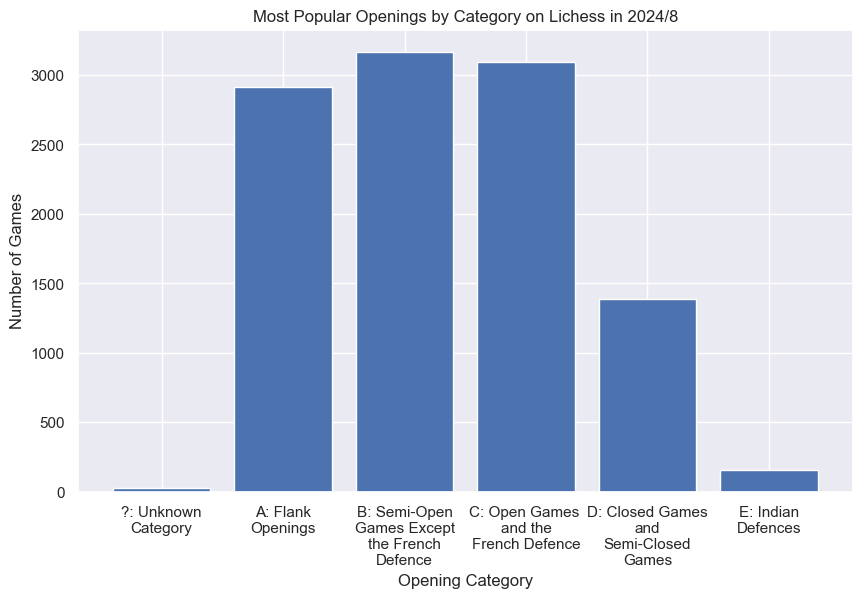

In [16]:
    # Map each opening category to its type.
    opening_category_map = {
        "A": "Flank\nOpenings",
        "B": "Semi-Open\nGames Except\nthe French\nDefence",
        "C": "Open Games \nand the\nFrench Defence",
        "D": "Closed Games\nand\nSemi-Closed\nGames",
        "E": "Indian\nDefences",
        "?": "Unknown\nCategory",
    }

    # Plot the number of games in each opening category.
    sns.set_theme(font_scale=1)
    fig, ax = plt.subplots(figsize=(10, 6))
    indexes = eco_categories.index
    values = eco_categories.values
    ax.bar(indexes, values)
    ax.set_title("Most Popular Openings by Category on Lichess in 2024/8")
    ax.set_xlabel("Opening Category")
    ax.set_ylabel("Number of Games")
    ax.set_xticklabels(
        [str(f"{index}: {opening_category_map[index]}") for index in indexes]
    )
    plt.show()

In [48]:
def analyze_game(game):
    """分析棋局以提取棋手風格特徵"""
    board = game.board()
    #print(board)
    moves = list(game.mainline_moves())
    features = {
        "early_center_control": 0,  # 開局中心控制
        "piece_sacrifices": 0,      # 犧牲
        "king_activity": 0,         # 王的活躍性
        "passed_pawns": 0,          # 通路兵
        "tactical_moves": 0         # 戰術進攻
    }
    
    for move_index, move in enumerate(moves):
        board.push(move)
        #print(board)
        #move_san = board.san(move)

        # 開局中心控制 (e4, d4, c4 等)
        if move_index < 10 and move.uci()[:2] in {"e2", "d2", "c2", "e7", "d7", "c7"}:
            features["early_center_control"] += 1

        # 戰術犧牲檢測 (是否存在犧牲)
        if board.is_capture(move) and board.is_attacked_by(not board.turn, move.to_square):
            features["piece_sacrifices"] += 1

        # 殘局王的活躍性 (王進入敵方半區)
        if board.fullmove_number > 40:
            king_square = board.king(board.turn)
            if board.turn == chess.WHITE and chess.square_rank(king_square) > 4:
                features["king_activity"] += 1
            elif board.turn == chess.BLACK and chess.square_rank(king_square) < 3:
                features["king_activity"] += 1

        # 推進通路兵
        piece = board.piece_at(move.to_square)
        if piece and piece.piece_type == chess.PAWN and not board.is_attacked_by(not board.turn, move.to_square):
            features["passed_pawns"] += 1

        # 簡單戰術判斷（如將軍與連續攻擊）
        if board.is_check():
            features["tactical_moves"] += 1

    # 統計結果
    return features

def determine_style(features):
    """根據特徵數據判斷棋手風格"""
    if features["piece_sacrifices"] > 2 or features["tactical_moves"] > 5:
        return "進攻型棋手"
    elif features["early_center_control"] > 5:
        return "控制型棋手"
    elif features["passed_pawns"] > 3 or features["king_activity"] > 2:
        return "殘局型棋手"
    else:
        return "均衡型棋手"

with open(pgn_file, "r", encoding="utf-8") as pgn:
    game = chess.pgn.read_game(pgn)
    features = analyze_game(game)
    style = determine_style(features)

print("特徵數據：", features)
print("棋手風格：", style)

特徵數據： {'early_center_control': 4, 'piece_sacrifices': 63, 'king_activity': 6, 'passed_pawns': 11, 'tactical_moves': 8}
棋手風格： 進攻型棋手


In [43]:
# 定义输入和输出文件路径
input_file = "CHUNK/chunk_1.pgn"  # 上传的文件路径
output_file = "chess_games.csv"  # 输出的CSV文件路径
output_file_test = "chess_games_test.csv"  # 输出的CSV文件路径
number = 0
# 统计棋局总数
total_games = 0
with open(input_file, "r", encoding="utf-8") as pgn:
    while chess.pgn.read_game(pgn) is not None:
        total_games += 1
# 设置只读取总数减 1 的棋局
max_games = total_games - 1
games_processed = 0
fieldnames = []  # 保持原顺序
games = []  # 用于存储每盘棋局数据
with open(input_file, "r", encoding="utf-8") as pgn:
    while games_processed < max_games:
        game = chess.pgn.read_game(pgn)
        if game is None:  # 如果没有更多棋局
            break

        # 收集字段名
        headers = game.headers
        for key in headers.keys():
            if key not in fieldnames:  # 按照出现顺序添加字段名
                fieldnames.append(key)

        # 添加棋局数据
        game_data = headers.copy()
        game_data["Moves"] = game.mainline_moves()  # 移动序列
        games.append(game_data)
        games_processed += 1

# 最后添加 "Moves" 列
if "Moves" not in fieldnames:
    fieldnames.append("Moves")

# 写入 CSV 文件
with open(output_file_test, "w", newline="", encoding="utf-8") as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()  # 写入表头
    for game_data in games:
        csv_writer.writerow(game_data)

print(f"全部棋局（不含最后一局）已保存到 CSV 文件：{output_file}")

全部棋局（不含最后一局）已保存到 CSV 文件：chess_games.csv


In [10]:
games_processed = 0
with open(input_file, "r", encoding="utf-8") as pgn:
    while games_processed < 1:
        game = chess.pgn.read_game(pgn)
        if game is None:  # 如果没有更多棋局
            break

        # 收集字段名
        headers = game.headers
        for key in headers.keys():
            if key not in fieldnames:  # 按照出现顺序添加字段名
                fieldnames.append(key)

        # 添加棋局数据
        game_data = headers.copy()
        game_data["Moves"] = game.mainline_moves()  # 移动序列
        games.append(game_data)
        games_processed += 1
        print(game_data["Moves"])

1. d4 g6 2. c4 Bg7 3. Nc3 b6 4. e4 Bb7 5. f3 c6 6. Be3 a5 7. Qd2 f6 8. Nge2 g5 9. Ng3 e6 10. Nh5 Bh6 11. h4 gxh4 12. Bxh6 Nxh6 13. Qxh6 d6 14. Nxf6+ Ke7 15. Rxh4 e5 16. Qg7+ Ke6 17. d5+ cxd5 18. cxd5+ Bxd5 19. exd5+ Kf5 20. Bd3+ e4 21. Bxe4+ Ke5 22. Nh5+ Qf6 23. Qxf6#
